## Imports


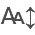

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itables import init_notebook_mode
import plotly.express as px


init_notebook_mode(all_interactive=True)

## Loading data

In [2]:
data = pd.read_excel(
    "../data/who_aap_2021_v9_11august2022.xlsx", sheet_name="AAP_2022_city_v9"
)
data.columns = [
    "WHO Region",
    "ISO3",
    "WHO Country Name",
    "City or Locality",
    "Measurement Year",
    "PM2.5",
    "PM10",
    "NO2",
    "PM2.5 temporal coverage",
    "PM10 temporal coverage",
    "NO2 temporal coverage",
    "Reference",
    "Number and type of monitoring stations",
    "Version of the database",
    "Status",
]
data

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                  2019  119.77    NaN    NaN                     18.0   
1                  2015     NaN  17.65  26.63                      NaN   
2                  2016   14.32  24.56  24.78                      NaN   
3                  2015     NaN    NaN  23.96                      NaN   
4                  2016     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186              2015    7.47  24.64   7.64                     75.0   
32187              2016    8.42  33.28   7.27                     75.0   
32188              2017    6.83  20.49   8.72                     75.0   
32189              2018    6.10  17.99   7.15                     75.0   
32190              2016     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
0                         NaN                    NaN   
1                         NaN              83.961187   
2                         NaN              87.932605   
3                         NaN              97.853881   
4                         NaN              96.049636   
...                       ...                    ...   
32186                    75.0              75.000000   
32187                    75.0              75.000000   
32188                    75.0              75.000000   
32189                    75.0              75.000000   
32190                     NaN              75.000000   

                                               Reference  \
0      U.S. Department of State, United States Enviro...   
1       European Environment Agency (downloaded in 2021)   
2       European Environment Agency (downloaded in 2021)   
3       European Environment Agency (downloaded in 2021)   
4       European Environment Agency (downloaded in 2021)   
...                                                  ...   
32186       South African Air Quality Information System   
32187       South African Air Quality Information System   
32188       South African Air Quality Information System   
32189       South African Air Quality Information System   
32190       South African Air Quality Information System   

      Number and type of monitoring stations  Version of the database  Status  
0                                        NaN                     2022     NaN  
1                                        NaN                     2022     NaN  
2                                        NaN                     2022     NaN  
3                                        NaN                     2022     NaN  
4                                        NaN                     2022     NaN  
...                                      ...                      ...     ...  
32186      3 Residential-Medium/Upper income                     2022     NaN  
32187      2 Residential-Medium/Upper income                     2022     NaN  
32188      2 Residential-Medium/Upper income                     2022     NaN  
32189

Biblioteka `ITables 2.0` ułatwia wyszukiwanie konkretnej wartości w wyświetlanych danych (DataFrame'ach). Dodatkowo pozwala obejrzeć cały output, niezależnie od jego wielkości, co jest niewątpliwym plusem. W kontekście badanych danych używano jej np. do podglądania, czy dla danej wartości zaszła przewidywana zmiana, co się kryje w innej kolumnie wiersza, gdzie znajduje się szukana wartość oraz do wspomnianego wcześniej przeglądania dłuższych outputów.

## Data review

#### Data types

In [3]:
data.dtypes

WHO Region                                 object
ISO3                                       object
WHO Country Name                           object
City or Locality                           object
Measurement Year                            int64
PM2.5                                     float64
PM10                                      float64
NO2                                       float64
PM2.5 temporal coverage                   float64
PM10 temporal coverage                    float64
NO2 temporal coverage                     float64
Reference                                  object
Number and type of monitoring stations     object
Version of the database                     int64
Status                                    float64
dtype: object

Wszystkie typy danych są zgodne z logiką i prezentowaną zawartością.

#### Basic statistics

In [4]:
data.describe()

Measurement Year         PM2.5          PM10           NO2  \
count      32191.000000  15048.000000  21109.000000  22200.000000   
mean        2015.579354     22.920320     30.533252     20.619336   
std            2.752654     17.925906     29.312756     12.133388   
min         2000.000000      0.010000      1.040000      0.000000   
25%         2014.000000     10.350000     16.980000     12.000000   
50%         2016.000000     16.000000     22.000000     18.800000   
75%         2018.000000     31.000000     31.300000     27.160000   
max         2021.000000    191.900000    540.000000    210.680000   

       PM2.5 temporal coverage  PM10 temporal coverage  NO2 temporal coverage  \
count              7275.000000             5381.000000           19890.000000   
mean                 90.794096               90.583500              93.696804   
std                  14.872681               13.816311              10.451751   
min                   0.000000                2.568493               1.923077   
25%                  88.595890               87.945205              93.207763   
50%                  97.000000               96.039000              96.369863   
75%                  99.000000               98.938000              98.926941   
max                 100.000000              100.000000             100.000000   

       Version of the database  Status  
count             32191.000000     0.0  
mean               2021.744214     NaN  
std                   1.051897     NaN  
min                2016.000000     NaN  
25%                2022.000000     NaN  
50%                2022.000000     NaN  
75%                2022.000000     NaN  
max                2022.000000     NaN

Minimalne i maksymalne wartości w kolumnach "PM2.5 temporal coverage", "PM10 temporal coverage" oraz "NO2 temporal coverage" są zgodne z logiką (wiedząc, że są to procenty rocznego pokrycia pomiarami od 0 do 100), zatem nie ma w tych kolumnach wartości odstających. Kolumna "Measurement Year" i "Version of the database columns", bazując na przedstawionych podstawowych statystykach, również wydają się nie zawierać wartości odstających. Co do kolumn "PM2.5", "PM10" oraz "NO2" - mogą one zawierać wartości odstające, ale mając na uwadze, że są to dane dotyczące wartości zanieczyszczeń powietrza, nie zaleca się usuwania ich - zdecydowanie zaburzyłoby to dalszą analizę i ograniczyło jej sens.

#### NAs

In [5]:
data.isna().sum()

WHO Region                                    1
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5                                     17143
PM10                                      11082
NO2                                        9991
PM2.5 temporal coverage                   24916
PM10 temporal coverage                    26810
NO2 temporal coverage                     12301
Reference                                     5
Number and type of monitoring stations    23433
Version of the database                       0
Status                                    32191
dtype: int64

Liczba wartości odstających (1) w kolumnie "WHO Region" budzi niepokój i zostanie to później sprawdzone. Wartości odstające w kolumnach "PM2.5", "PM10" i "NO2" wynikają z braku dokonania pomiaru w danym mieście w danym roku i ich typ można określić jako MAR - wartości tych brakuje często dla konkretnych lokalizacji lub lat. Braki w "PM2.5 temporal coverage", "PM10 temporal coverage" i "NO2 temporal coverage" również wynikają z braku wprowadzenia ich do bazy przez dane źródło, choć ich typ przypomina tu bardziej MCAR - nie zależy to od pozostałych danych. 5 NaNs w kolumnie "Reference" również zostanie zbadane w dalszej analizie. Kolumna "Number and type of monitoring stations" zawiera bardzo wiele wartości brakujących, ich typ również najbardziej przypomina MCAR. Kolumna "Status" w 100% składa się z NaNów, więc zostanie ona najprawdopodobniej usunięta na etapie selekcji atrybutów.

#### Checking the NA in WHO Region column

In [6]:
data[data["WHO Region"].isna()]

WHO Region ISO3 WHO Country Name City or Locality  Measurement Year  \
24778        NaN  LIE    Liechtenstein            Vaduz              2010   

       PM2.5   PM10    NO2  PM2.5 temporal coverage  PM10 temporal coverage  \
24778    NaN  17.88  23.59                      NaN                  96.164   

       NO2 temporal coverage  \
24778                 98.265   

                                               Reference  \
24778  European Environment Information and Observati...   

      Number and type of monitoring stations  Version of the database  Status  
24778                                    NaN                     2022     NaN

In [7]:
data["WHO Region"].unique()

array(['Eastern Mediterranean Region', 'European Region',
       'Region of the Americas', 'Western Pacific Region',
       'South East Asia Region', 'African Region', nan], dtype=object)

In [8]:
na_slice = data[data["WHO Region"].isna()].copy()
na_slice.fillna({"WHO Region": "European Region"}, inplace=True)
data.update(na_slice)
data[data["ISO3"] == "LIE"]

WHO Region ISO3 WHO Country Name City or Locality  \
24778  European Region  LIE    Liechtenstein            Vaduz   

       Measurement Year  PM2.5   PM10    NO2  PM2.5 temporal coverage  \
24778            2010.0    NaN  17.88  23.59                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
24778                  96.164                 98.265   

                                               Reference  \
24778  European Environment Information and Observati...   

      Number and type of monitoring stations  Version of the database  Status  
24778                                    NaN                   2022.0     NaN

Jedna brakująca wartość w kolumnie "WHO Region" istniała dla Lichtensteinu. Wynikało to najprawdopodobniej z błędu przy wprowadzaniu danych do bazy. Jako że Lichtenstein leży na terenie Europy założono, że należy on do tego samego regionu WHO co inne europejskie państwa, więc wypełniono brak odpowiednim regionem.

#### Checking NAs in Reference column

In [9]:
data[data["Reference"].isna()]

WHO Region ISO3 WHO Country Name City or Locality  \
28209  Eastern Mediterranean Region  QAT            Qatar             Doha   
28210  Eastern Mediterranean Region  QAT            Qatar             Doha   
28211  Eastern Mediterranean Region  QAT            Qatar             Doha   
28212  Eastern Mediterranean Region  QAT            Qatar             Doha   
28213  Eastern Mediterranean Region  QAT            Qatar             Doha   

       Measurement Year  PM2.5   PM10   NO2  PM2.5 temporal coverage  \
28209            2017.0   44.0  148.0  29.0                     98.0   
28210            2018.0   44.0  181.0  47.0                     99.0   
28211            2019.0   41.0  208.0  42.0                     97.0   
28212            2020.0   33.0  108.0  28.0                     98.0   
28213            2021.0   38.0  150.0  30.0                     97.0   

       PM10 temporal coverage  NO2 temporal coverage Reference  \
28209                    96.0                   99.0       NaN   
28210                    97.0                   99.0       NaN   
28211                    97.0                   99.0       NaN   
28212                    98.0                   99.0       NaN   
28213                    96.0                   99.0       NaN   

          Number and type of monitoring stations  Version of the database  \
28209  Roadside, residential and commercial area                   2022.0   
28210  Roadside, residential and commercial area                   2022.0   
28211  Roadside, residential and commercial area                   2022.0   
28212  Roadside, residential and commercial area                   2022.0   
28213  Roadside, residential and commercial area                   2022.0   

       Status  
28209     NaN  
28210     NaN  
28211     NaN  
28212     NaN  
28213     NaN

Braki w kolumnie "Reference" występują tylko dla Dohy w Katarze. Z powodu niemożności oszacowania możliwego źródła danych z tego obszaru oraz mając na uwadze małe znaczenie tej informacji w kontekście przeprowadzanej analizy, zdecydowano pozostawić ten brak takim, jakim jest.

#### NAs in Number and type of monitoring stations column
Co do braków w kolumnie "Number and types of monitoring stations" liczba stacji może się zmieniać z czasem (dodawane są nowe, bądź aktualne mają awarię), więc uzupełnianie ich tą samą wartością, która znajduje się dla danego roku i miasta może wprowadzać w błąd. Dodatkowo, niektóre źródła nie zapewniają wcale takich informacji, więc biorąc to wszystko pod uwagę nic nie zrobiono w tymi brakami, jednocześnie wiedząc, że usunięcie ich znacznie skróciłoby dostępny zbiór danych. Typ tych braków można zakwalifikować jako MNAR, ponieważ może on zależeć od innych czynników niż dostępne.

#### Relation between variables

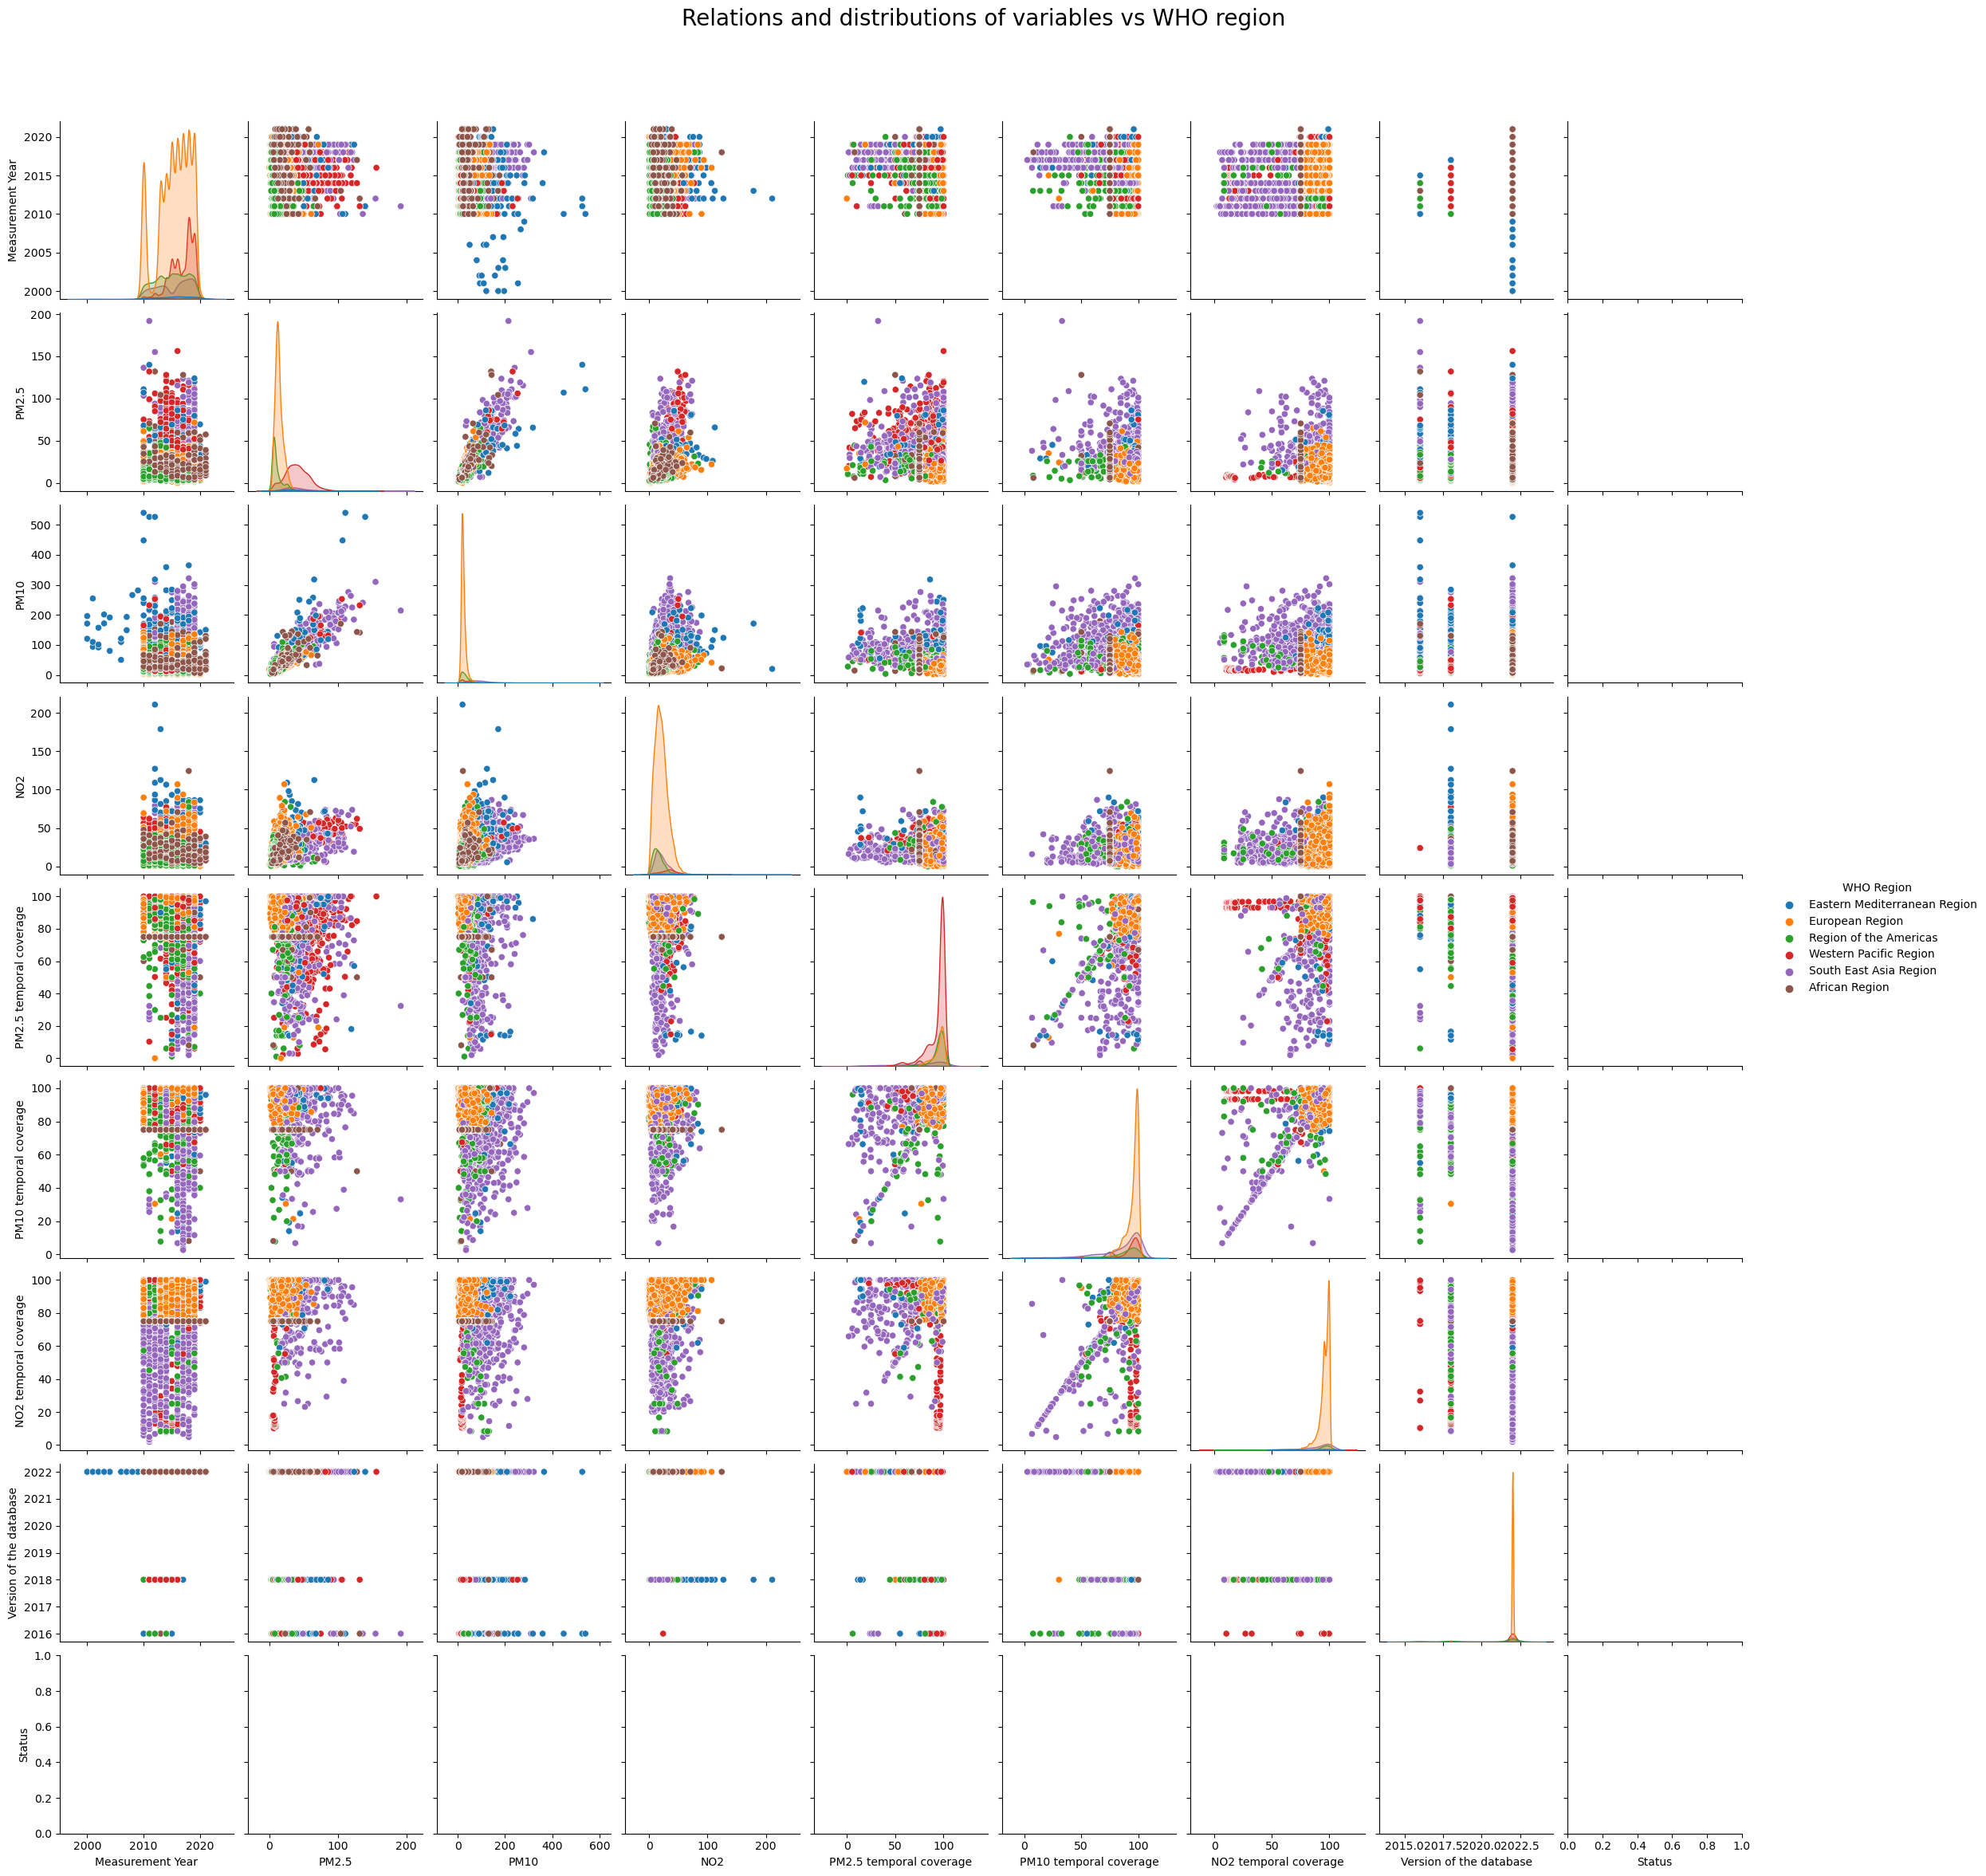

In [10]:
sns.pairplot(data, hue="WHO Region").fig.suptitle(
    "Relations and distributions of variables vs WHO region", y=1.05, fontsize=20
)
plt.show()

Z przedstawionej figury można odczytać pewne relacje, np. dodatnia zależność liniowa między wartościami PM2.5 i PM10, co zostanie dogłębniej zbadane w dalszych etapach.

## Feature selection and feature engineering

In [11]:
data.drop(columns=["Version of the database", "Status"], inplace=True)

Zadecydowano o usunięciu kolumny "Status", ponieważ składała się ona w 100% w NaNów, więc nie wnosiła nic do analizy. Dodatkowo usunięto kolumnę "Version of the database", ponieważ nie wpływała ona na wyjaśnienie wartości zanieczyszczeń powietrza.

In [12]:
def extract_and_sum_numbers(text):
    if pd.notna(text):
        numbers = [
            int(word.split()[0])
            for word in text.split(",")
            if word.strip()[0].isdigit()
        ]
        return sum(numbers)
    else:
        return np.nan


data["Total number of stations"] = data["Number and type of monitoring stations"].apply(
    extract_and_sum_numbers
)
data

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                2019.0  119.77    NaN    NaN                     18.0   
1                2015.0     NaN  17.65  26.63                      NaN   
2                2016.0   14.32  24.56  24.78                      NaN   
3                2015.0     NaN    NaN  23.96                      NaN   
4                2016.0     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186            2015.0    7.47  24.64   7.64                     75.0   
32187            2016.0    8.42  33.28   7.27                     75.0   
32188            2017.0    6.83  20.49   8.72                     75.0   
32189            2018.0    6.10  17.99   7.15                     75.0   
32190            2016.0     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
0                         NaN                    NaN   
1                         NaN              83.961187   
2                         NaN              87.932605   
3                         NaN              97.853881   
4                         NaN              96.049636   
...                       ...                    ...   
32186                    75.0              75.000000   
32187                    75.0              75.000000   
32188                    75.0              75.000000   
32189                    75.0              75.000000   
32190                     NaN              75.000000   

                                               Reference  \
0      U.S. Department of State, United States Enviro...   
1       European Environment Agency (downloaded in 2021)   
2       European Environment Agency (downloaded in 2021)   
3       European Environment Agency (downloaded in 2021)   
4       European Environment Agency (downloaded in 2021)   
...                                                  ...   
32186       South African Air Quality Information System   
32187       South African Air Quality Information System   
32188       South African Air Quality Information System   
32189       South African Air Quality Information System   
32190       South African Air Quality Information System   

      Number and type of monitoring stations  Total number of stations  
0                                        NaN                       NaN  
1                                        NaN                       NaN  
2                                        NaN                       NaN  
3                                        NaN                       NaN  
4                                        NaN                       NaN  
...                                      ...                       ...  
32186      3 Residential-Medium/Upper income                       3.0  
32187      2 Residential-Medium/Upper income                       2.0  
32188      2 Residential-Medium/Upper income                       2.0  
32189      2 Residential-Medium/Upper income                       2.0  
32

Dodano nową zmienną "Total number w stations", aby zbadać zależność ilości stacji pomiarowych od wartości zanieczyszczeń - czy np. bardziej zanieczyszczone regiony stawiają więcej stacji, aby być świadomym zagrożenia, czy też nie.

In [13]:
region_dummies = pd.get_dummies(data["WHO Region"])
data_dummies = pd.concat([data, region_dummies], axis=1)
data_dummies

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                2019.0  119.77    NaN    NaN                     18.0   
1                2015.0     NaN  17.65  26.63                      NaN   
2                2016.0   14.32  24.56  24.78                      NaN   
3                2015.0     NaN    NaN  23.96                      NaN   
4                2016.0     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186            2015.0    7.47  24.64   7.64                     75.0   
32187            2016.0    8.42  33.28   7.27                     75.0   
32188            2017.0    6.83  20.49   8.72                     75.0   
32189            2018.0    6.10  17.99   7.15                     75.0   
32190            2016.0     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
0                         NaN                    NaN   
1                         NaN              83.961187   
2                         NaN              87.932605   
3                         NaN              97.853881   
4                         NaN              96.049636   
...                       ...                    ...   
32186                    75.0              75.000000   
32187                    75.0              75.000000   
32188                    75.0              75.000000   
32189                    75.0              75.000000   
32190                     NaN              75.000000   

                                               Reference  \
0      U.S. Department of State, United States Enviro...   
1       European Environment Agency (downloaded in 2021)   
2       European Environment Agency (downloaded in 2021)   
3       European Environment Agency (downloaded in 2021)   
4       European Environment Agency (downloaded in 2021)   
...                                                  ...   
32186       South African Air Quality Information System   
32187       South African Air Quality Information System   
32188       South African Air Quality Information System   
32189       South African Air Quality Information System   
32190       South African Air Quality Information System   

      Number and type of monitoring stations  Total number of stations  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                        NaN                       NaN   
4                                        NaN                       NaN   
...                                      ...                       ...   
32186      3 Residential-Medium/Upper income                       3.0   
32187      2 Residential-Medium/Upper income                       2.0   
32188      2 Residential-Medium/Upper income                       2.0   
32189      2 Residential-Medium/Upper income                     

In [14]:
country_dummies = pd.get_dummies(data["WHO Country Name"])
data_dummies = pd.concat([data_dummies, country_dummies], axis=1)
data_dummies

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                2019.0  119.77    NaN    NaN                     18.0   
1                2015.0     NaN  17.65  26.63                      NaN   
2                2016.0   14.32  24.56  24.78                      NaN   
3                2015.0     NaN    NaN  23.96                      NaN   
4                2016.0     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186            2015.0    7.47  24.64   7.64                     75.0   
32187            2016.0    8.42  33.28   7.27                     75.0   
32188            2017.0    6.83  20.49   8.72                     75.0   
32189            2018.0    6.10  17.99   7.15                     75.0   
32190            2016.0     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  ...  Uganda Ukraine United Arab Emirates  \
0                         NaN  ...       0       0                    0   
1                         NaN  ...       0       0                    0   
2                         NaN  ...       0       0                    0   
3                         NaN  ...       0       0                    0   
4                         NaN  ...       0       0                    0   
...                       ...  ...     ...     ...                  ...   
32186                    75.0  ...       0       0                    0   
32187                    75.0  ...       0       0                    0   
32188                    75.0  ...       0       0                    0   
32189                    75.0  ...       0       0                    0   
32190                     NaN  ...       0       0                    0   

       United Kingdom  United Republic of Tanzania  United States of America  \
0                   0                            0                         0   
1                   0                            0                         0   
2                   0                            0                         0   
3                   0                            0                         0   
4                   0                            0                         0   
...               ...                          ...                       ...   
32186               0                            0                         0   
32187               0                            0                         0   
32188               0                            0                         0   
32189               0                            0                         0   
32190               0                            0                         0   

       Uruguay  Uzbekistan  Venezuela (Bolivarian Republic of)  Viet Nam  
0            0           0                                   0         0  
1            0           0                                   0         0  
2            0           0                                   0         0  
3            0           0           

Do odpowiednich kopii ogólnego datasetu dodano także dummy values utworzone na podstawie kolumn "WHO Region" oraz "WHO Country Name", aby móc sprawdzić zależność między danym krajem lub regionem (do regresji punktowo-dwuseryjnej).

## WHO Region-based analysis

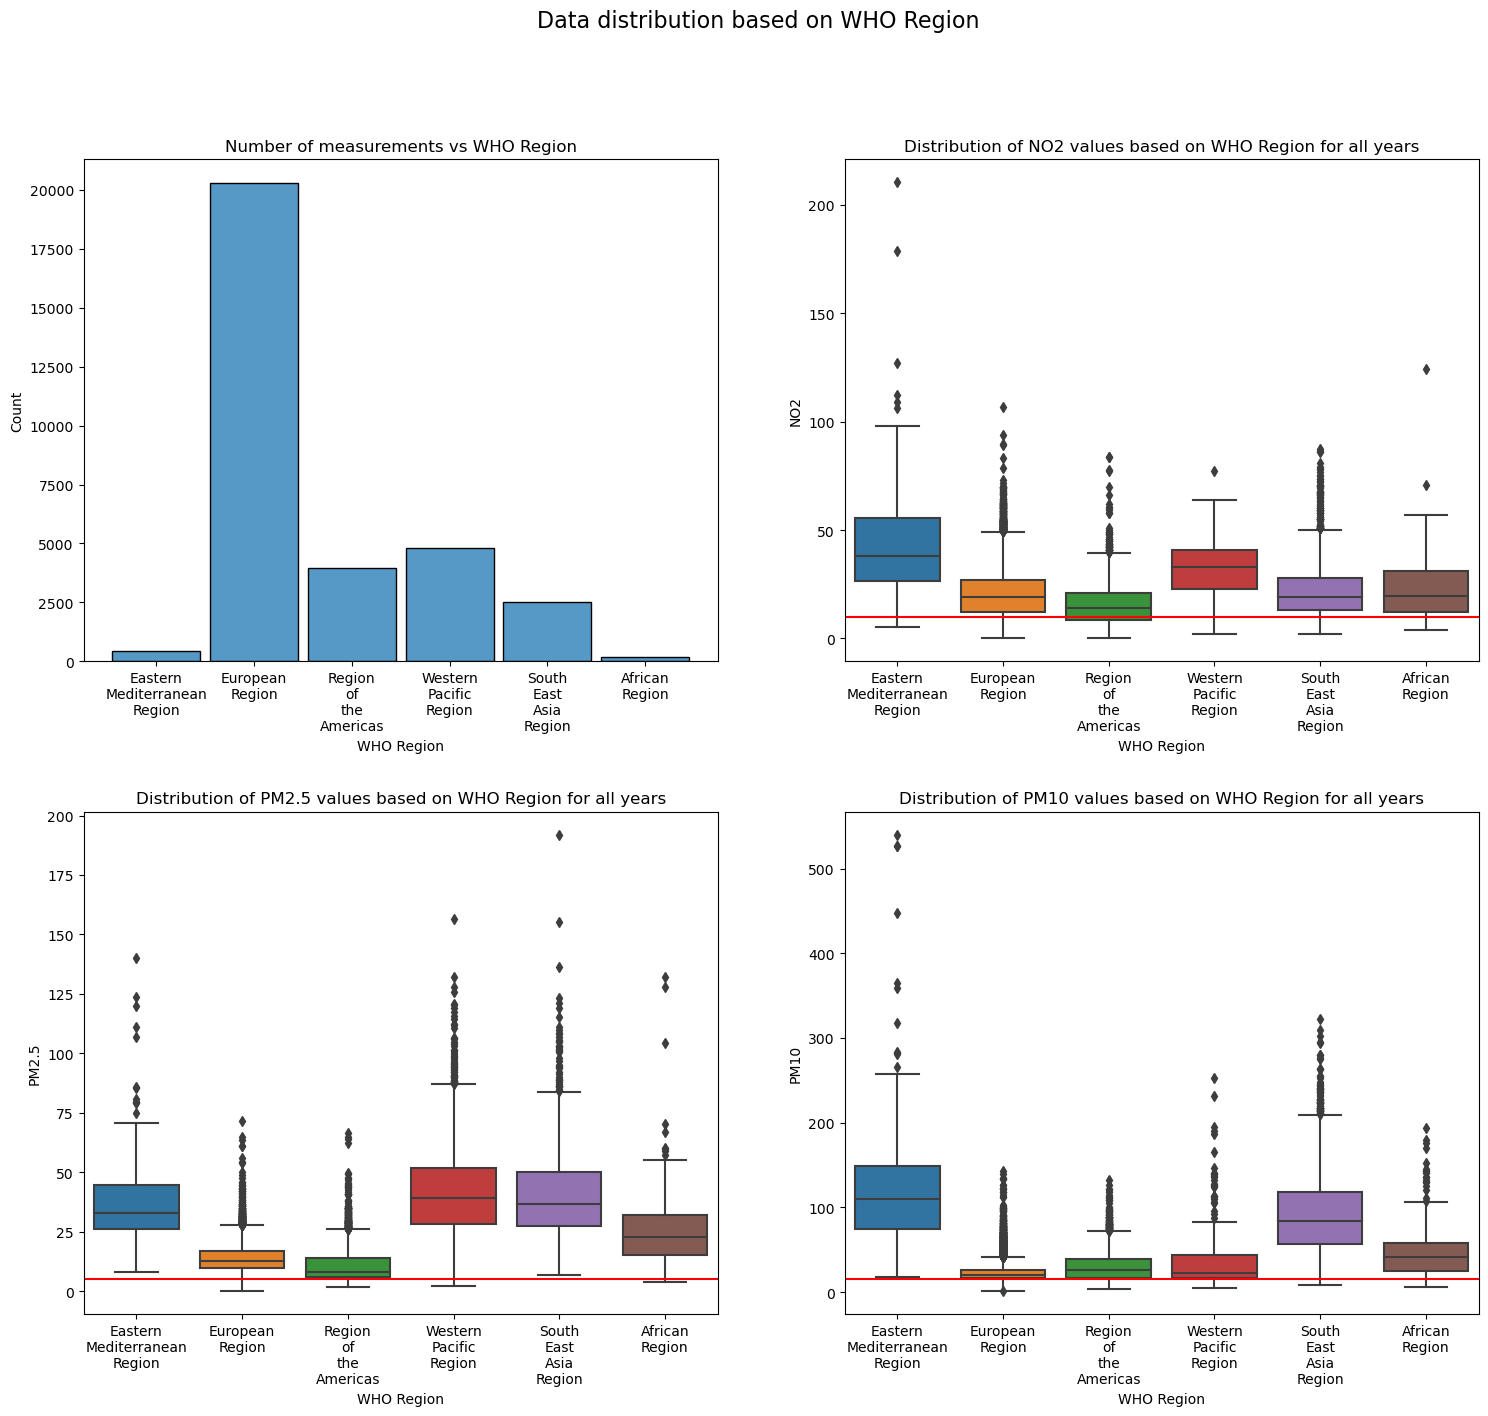

In [15]:
xlabels = [x.replace(" ", "\n") for x in data["WHO Region"].unique()]
xlabels

fig, ax = plt.subplots(2, 2, figsize=(18, 15))

sns.histplot(data=data, x="WHO Region", ax=ax[0, 0], shrink=0.9)
ax[0, 0].set_xticks(ticks=range(len(xlabels)), labels=xlabels)
ax[0, 0].set(title="Number of measurements vs WHO Region")

sns.boxplot(data=data, y="NO2", x="WHO Region", ax=ax[0, 1])
ax[0, 1].axhline(y=10, color="r")
ax[0, 1].set_xticks(ticks=range(len(xlabels)), labels=xlabels)
ax[0, 1].set(title="Distribution of NO2 values based on WHO Region for all years")

sns.boxplot(data=data, y="PM2.5", x="WHO Region", ax=ax[1, 0])
ax[1, 0].axhline(y=5, color="r")
ax[1, 0].set_xticks(ticks=range(len(xlabels)), labels=xlabels)
ax[1, 0].set(title="Distribution of PM2.5 values based on WHO Region for all years")

sns.boxplot(data=data, y="PM10", x="WHO Region", ax=ax[1, 1])
ax[1, 1].axhline(y=15, color="r")
ax[1, 1].set_xticks(ticks=range(len(xlabels)), labels=xlabels)
ax[1, 1].set(title="Distribution of PM10 values based on WHO Region for all years")

plt.suptitle("Data distribution based on WHO Region", fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

Analizę rozpoczęto od generalizacji na regiony WHO. Wykres w lewym górnym rogu przedstawia ilość pomiarów wykonaną dla każdego regionu. Jak widać, zdecydowanie przoduje region europejski, co może świadczyć o największej świadomości ekologicznej w tym regionie. Najgorzej wypadają tu region Wschodniego Morza Śródziemnego oraz Afryka, głównie ze względu na to, że w tych regionach jest wiele krajów biednych, rozwijających się, do których świadomość ekologiczna jeszcze nie dotarła, bądź jest traktowana po macoszemu.\
Pozostałe wykresy przedstawiają rozkład wartości zanieczyszczeń z podziałem na regiony. Czerwona linia oznacza normę uznaną przez WHO dla każdego z zanieczyszczeń. Pokazuje to jak złym powietrzem oddycha się na całym świecie. Najlepiej pod względem PM2.5 wypada region Ameryk oraz Europa, mając jednak na uwadze liczne wartości powyżej 95 percentyla. Najgorsza sytuacja panuje w regionie Zachodniego Pacyfiku (gdzie normy zawyżają Chiny oraz Wietnam) oraz w Azji Południowo-Wschodniej (tutaj głównym winowajcą są Indie). W przypadku PM10 sytuacja wygląda podobnie pod względem niskich wartości - tu przodują wciąż Europa i Ameryki, ale tym razem najgorsze powietrze (pod względem PM10) jest w regionie Wschodniego Morza Śródziemniego oraz w Azji Południowo-Wschodniej. Analogicznie badając wartości NO2.

#### Correlation

In [16]:
data.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5', 'PM10', 'NO2', 'PM2.5 temporal coverage',
       'PM10 temporal coverage', 'NO2 temporal coverage', 'Reference',
       'Number and type of monitoring stations', 'Total number of stations'],
      dtype='object')

In [17]:
corr_cols = [
    "Measurement Year",
    "PM2.5",
    "PM10",
    "NO2",
    "PM2.5 temporal coverage",
    "PM10 temporal coverage",
    "NO2 temporal coverage",
    "Total number of stations",
]

corr_df = data[corr_cols].corr()

Wybrano jedynie takie kolumny do analizy korelacji liniowej Pearsona, które zawierają wartości ciągłe.

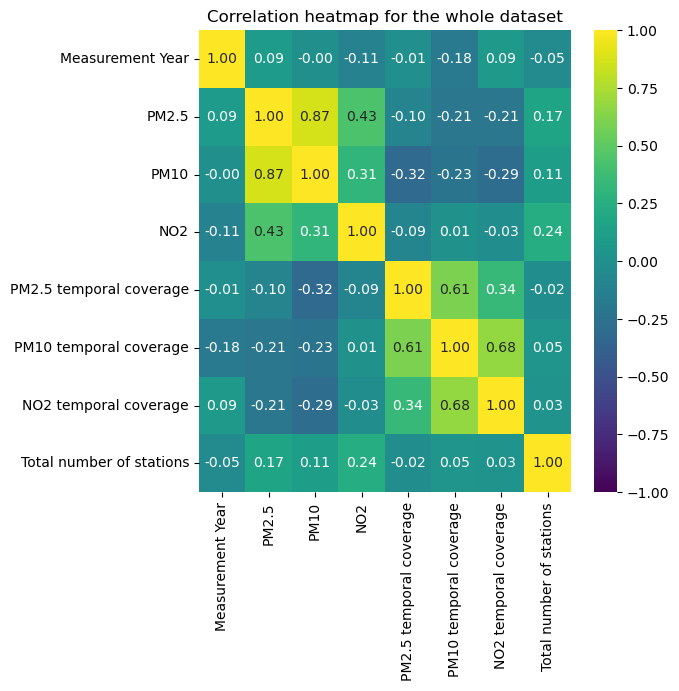

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.heatmap(
    corr_df,
    ax=ax,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    annot_kws={"fontsize": 10},
)
ax.set(title="Correlation heatmap for the whole dataset")

plt.show()

Wartości korelacji liniowej dla całego zbioru danych wyraźnie wskazują istotną zależność między wartościami PM2.5 oraz PM10, a także mniejsze pomiędzy NO2 a PM2.5 oraz PM10. Ponadto można odczytać niewielkie ujemne zależności między wartościami PM2.5, PM10 i NO2 a stopniem rocznego pokrycia każdej z nich - jest to ciekawe, ponieważ pokazuje, że im częściej wykonywano pomiary, tym mniejsze były zanieczyszczenia, co może być pośrednio z korelowane z tym, że większe pokrycie występowało najprawdopodobniej w krajach bardziej rozwiniętych. Ponadto wystepują dodatnie zależności między pokryciami każdego ze współczynników, co jest dość logiczne - jeśli stacja mierzyła jeden, to najczęściej i pozostałe współczynniki, i na odwrót. Występuje też niewielka dodatnia zależność pomiędzy ilością stacji pomiarowych a wartością NO2.

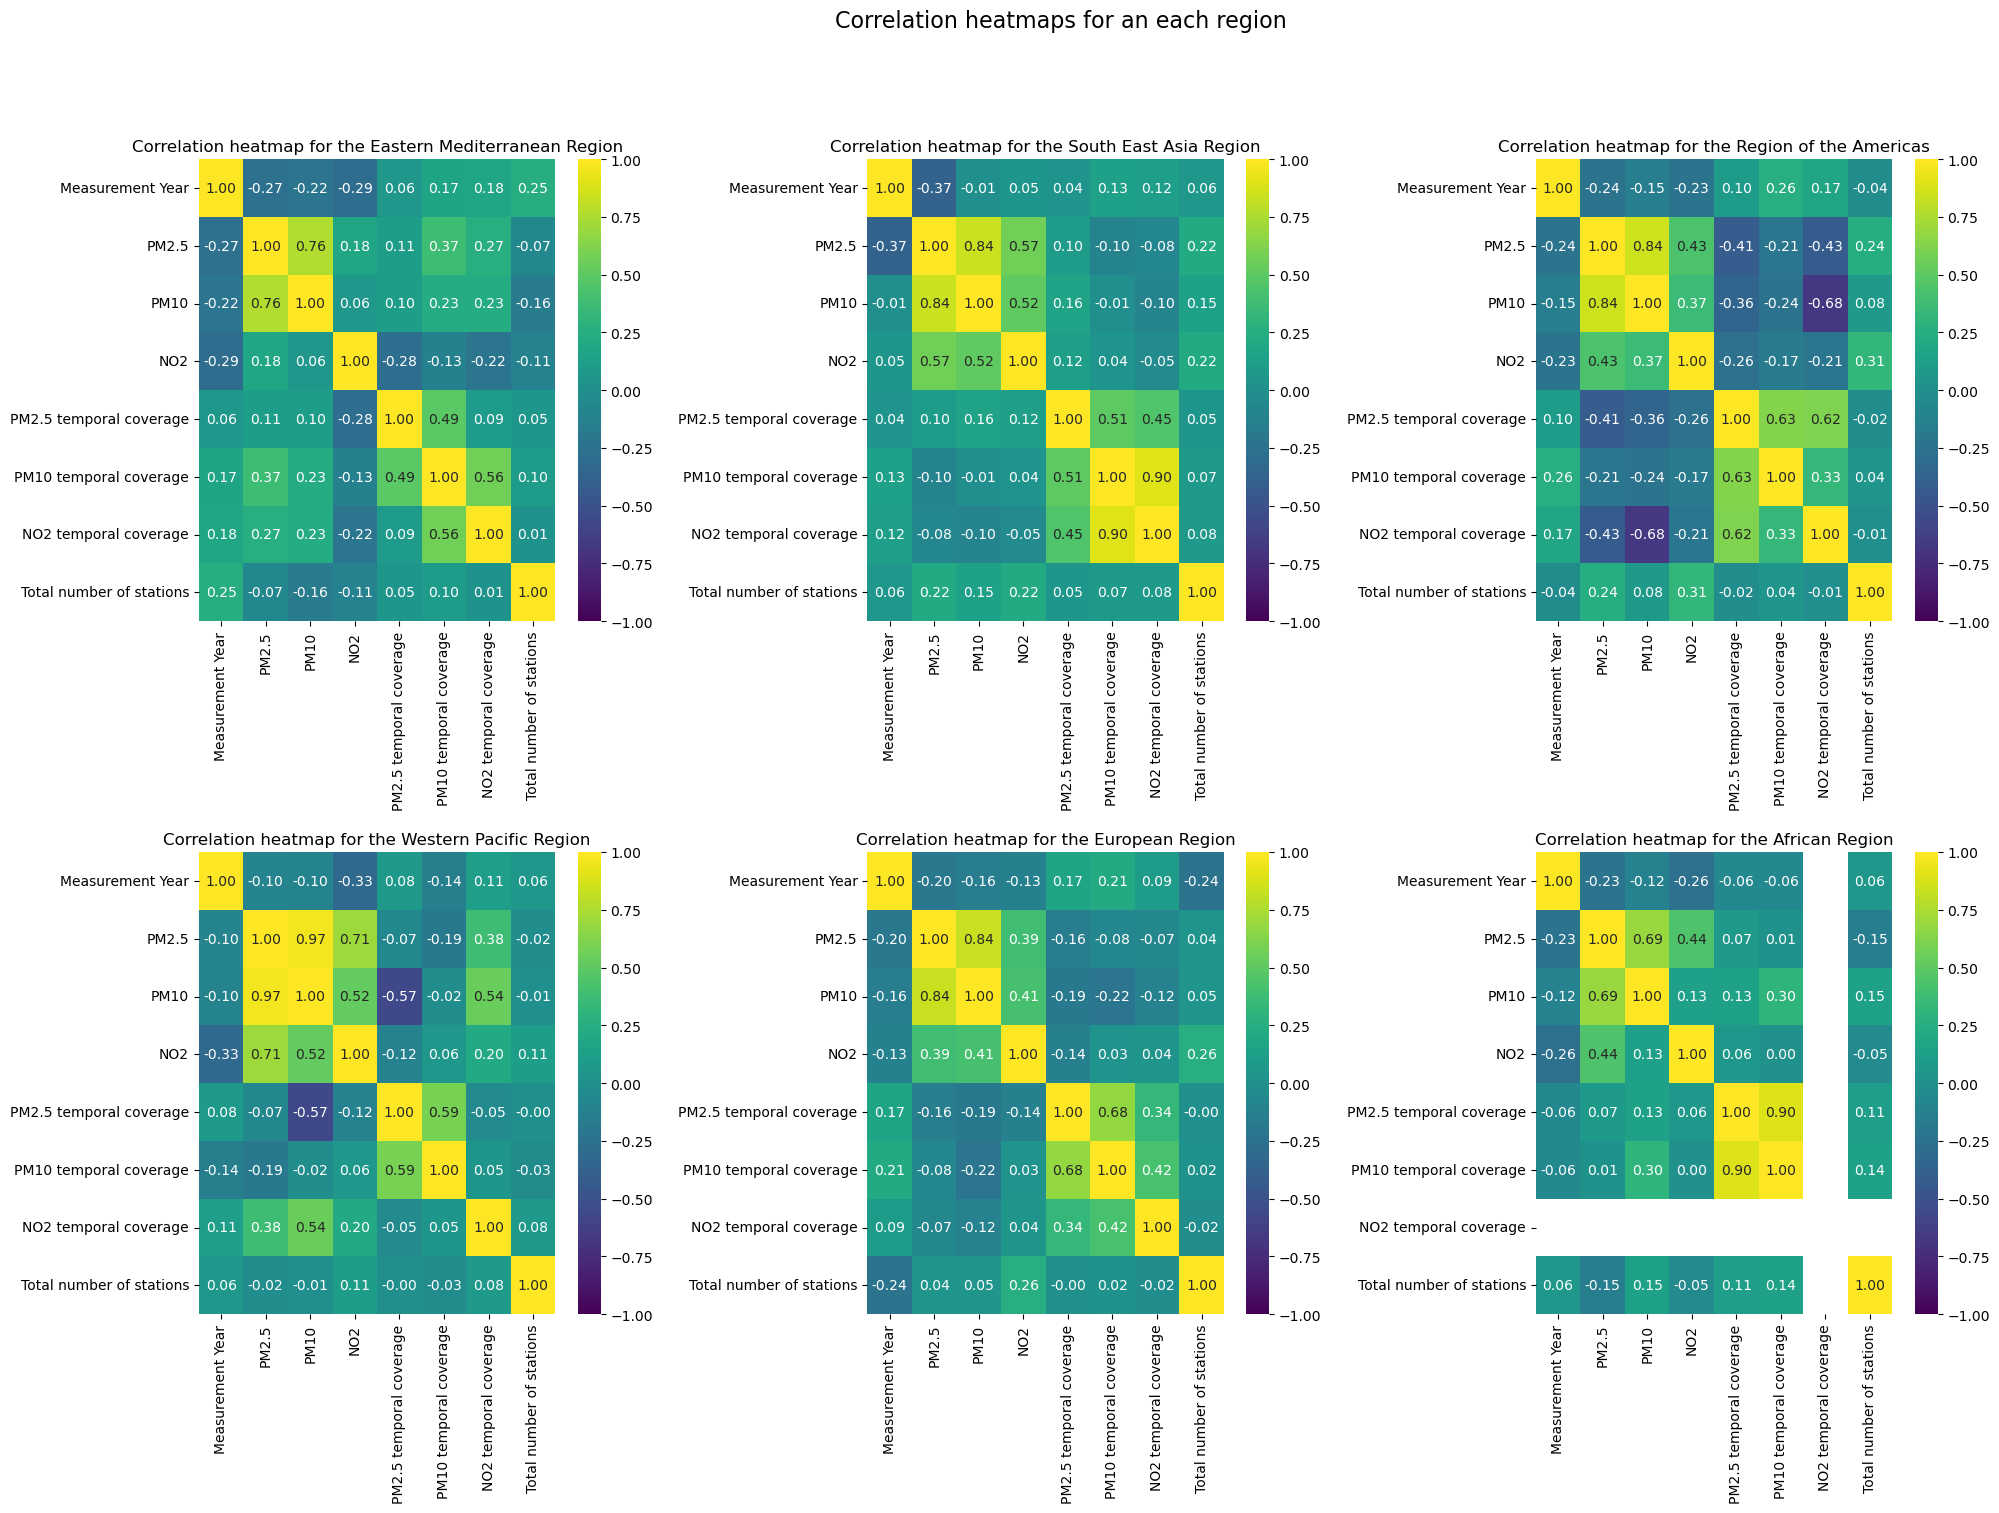

In [19]:
i = 0
j = 0

fig, ax = plt.subplots(2, 3, figsize=(23, 15))

for r in data["WHO Region"].unique():
    corr_df = data[data["WHO Region"] == r][corr_cols].corr()
    sns.heatmap(
        corr_df,
        ax=ax[i][j],
        vmin=-1,
        vmax=1,
        center=0,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        annot_kws={"fontsize": 10},
    )
    ax[i][j].set(title=f"Correlation heatmap for the {r}")
    i += 1
    i %= 2
    j += 1
    j %= 3

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Correlation heatmaps for an each region", fontsize=16)
plt.show()

Na powyższych heatmapach przedstawiono zależności pomiędzy poszczególnymi zmiennymi dla każdego z regionów. Wartości współczynników korelacji nieraz mocno różnią się od siebie, jednak wszędzie występują duże dodatnie zależności pomiędzy wartościami każdego ze współczynników, szczególnie PM2.5 i PM10. Ponadto w regionie Azji Południowo-Wschodniej występuje ujemna zależność między rokiem pomiaru a wartością PM2.5. Wskazuje to na nieznaczną poprawę jakości powietrza w tym regionie wraz z upływem lat. Dla regionu Ameryk wyróżniają się ujemne zależności między wartościami współczynników a ich stopniem rocznego pokrycia. W regionie europejskim wyróżniają się wysokie wartości współczynników dla stopni pokrycia dla siebie nawzajem, co może wskazywać, że zazwyczaj europejskie czujniki mierzą wszystkie z 3 rodzajów zanieczyszczeń. Dla Afryki widać, że zupełnie nie wypełniano kolumny z rocznym pokryciem pomiarami współczynnika NO2 oraz, że występuje bardzo silna pozytywna zależność między stopniem pokrycia PM2.5 i PM10.

#### Point-biserial correlation

In [20]:
for r in data_dummies["WHO Region"].unique():
    print(f"\n{r}:")
    for c in corr_cols:
        temp_df = data_dummies.dropna(subset=c)
        print(f"{r} vs {c}: {stats.pointbiserialr(temp_df[r], temp_df[c])}")


Eastern Mediterranean Region:
Eastern Mediterranean Region vs Measurement Year: SignificanceResult(statistic=-0.020433493981191153, pvalue=0.00024600122593072257)
Eastern Mediterranean Region vs PM2.5: SignificanceResult(statistic=0.1031366363946883, pvalue=7.199182966700921e-37)
Eastern Mediterranean Region vs PM10: SignificanceResult(statistic=0.36426022043226786, pvalue=0.0)
Eastern Mediterranean Region vs NO2: SignificanceResult(statistic=0.17002278268537616, pvalue=1.264128529846678e-143)
Eastern Mediterranean Region vs PM2.5 temporal coverage: SignificanceResult(statistic=-0.14136809403182024, pvalue=8.62450943600881e-34)
Eastern Mediterranean Region vs PM10 temporal coverage: SignificanceResult(statistic=-0.07623380154639861, pvalue=2.1558817653567293e-08)
Eastern Mediterranean Region vs NO2 temporal coverage: SignificanceResult(statistic=-0.007052246771967366, pvalue=0.31995921477155914)
Eastern Mediterranean Region vs Total number of stations: SignificanceResult(statistic=0.0

Badając wartości współczynników korelacji punktowo-dwuseryjnej zaobserowowano:
- dla regionu Wschodniego Morza Śródziemnego występuje dodatnia zależność wobec wartości PM10 - czyli tutaj są one zazwyczaj większe niż w innych regionach
- w Europie występują wysokie ujemne zależności wobec PM2.5 oraz PM10 - powietrze jest nieco czystsze
- dla regionu Ameryk występuje niewielka ujemna zależność wobec PM2.5
- dla Azji Południowo-Wschodniej zachodzi duża dodatnia zależność wobec wartości PM10 - w tym regionie są one wyższe niż w pozostałych; ponadto występuje tu zazwyczaj wyższe roczne pokrycie pomiarami
- dla Afryki nie zauważono żadnych znaczących zależności

#### Air pollution across years

In [21]:
grouped_df_pm25 = data.groupby(["WHO Region", "Measurement Year"])["PM2.5"].mean(
    numeric_only=True
)
grouped_df_pm10 = data.groupby(["WHO Region", "Measurement Year"])["PM10"].mean(
    numeric_only=True
)
grouped_df_no2 = data.groupby(["WHO Region", "Measurement Year"])["NO2"].mean(
    numeric_only=True
)

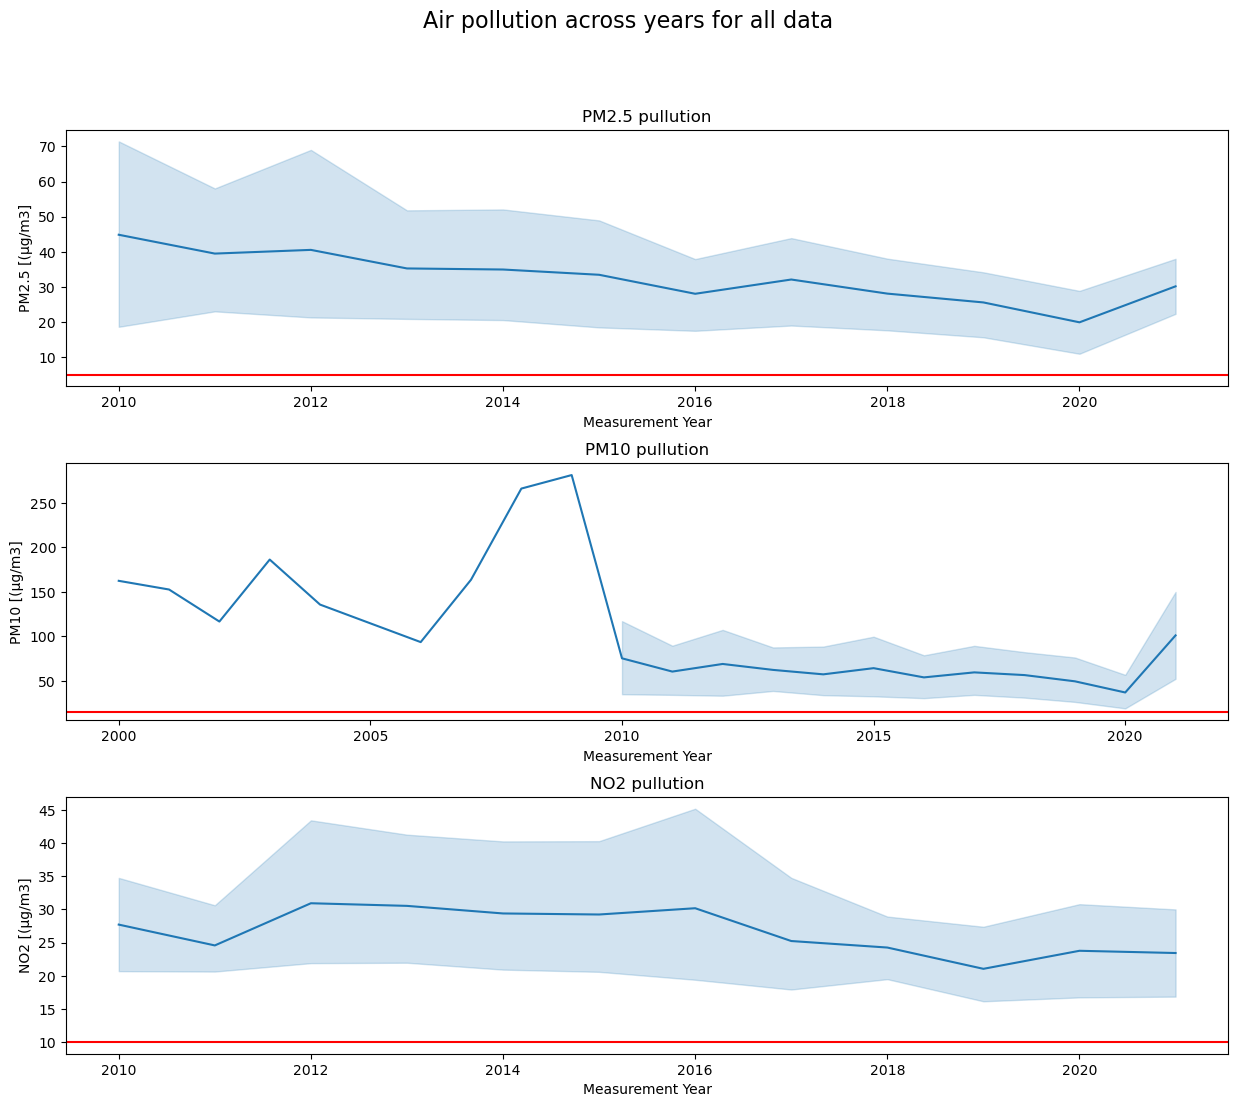

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

sns.lineplot(grouped_df_pm25, x="Measurement Year", y=grouped_df_pm25.values, ax=ax[0])
ax[0].axhline(y=5, color="r")
ax[0].set(title="PM2.5 pullution", ylabel="PM2.5 [(μg/m3]")

sns.lineplot(grouped_df_pm10, x="Measurement Year", y=grouped_df_pm10.values, ax=ax[1])
ax[1].axhline(y=15, color="r")
ax[1].set(title="PM10 pullution", ylabel="PM10 [(μg/m3]")

sns.lineplot(grouped_df_no2, x="Measurement Year", y=grouped_df_no2.values, ax=ax[2])
ax[2].axhline(y=10, color="r")
ax[2].set(title="NO2 pullution", ylabel="NO2 [(μg/m3]")

plt.suptitle("Air pollution across years for all data", fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

Dla całości danych przedstawiono wartości współczynników zanieczyszczenia powietrza dla kolejnych lat. Jasnoniebieska obwoluta pokazuje przedziały ufności, a raczej w tym przypadku - maksymalne i minimalne wartości średnich dla każdego z regionów. Czerwoną linią oznaczona normę przyjętą przez WHO dla każdego ze współczynników. W przypadku każdego z nich widać generalną (delikatną) tendencję spadkową w ostatnich latach, jednak z przyrostem w ostatnim badanym roku dla PM2.5 oraz PM10.

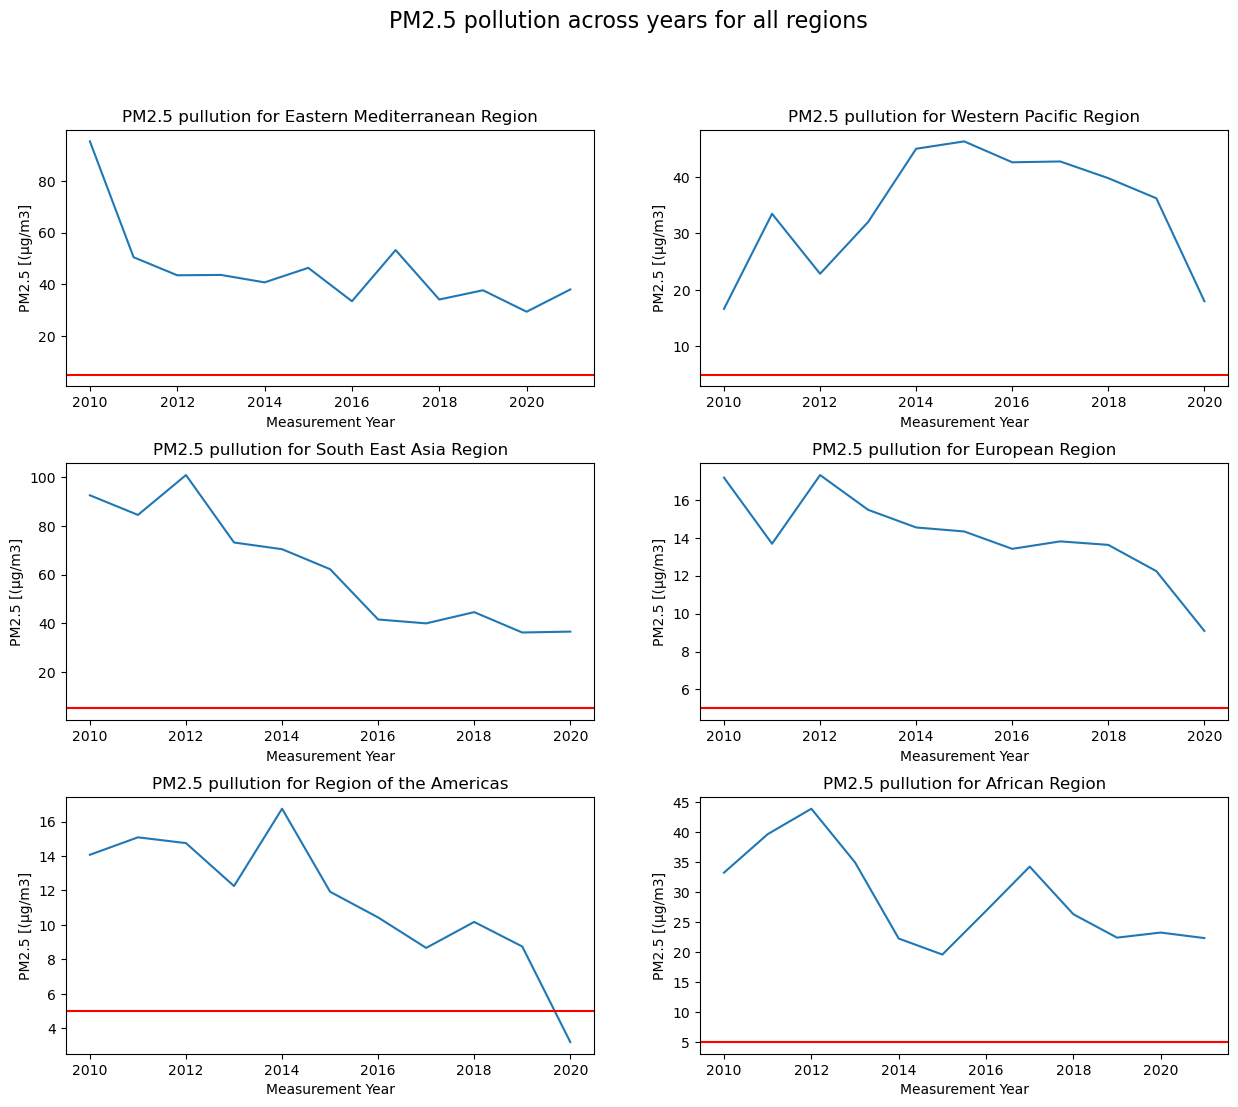

In [23]:
i = 0
j = 0

fig, ax = plt.subplots(3, 2, figsize=(15, 12))

for r in data["WHO Region"].unique():

    sub_grouped_df = grouped_df_pm25[
        grouped_df_pm25.index.get_level_values("WHO Region").isin([r])
    ]

    sns.lineplot(
        sub_grouped_df,
        x="Measurement Year",
        y=sub_grouped_df.values,
        ax=ax[i, j],
    )
    ax[i, j].axhline(y=5, color="r")
    ax[i, j].set(title=f"PM2.5 pullution for {r}", ylabel="PM2.5 [(μg/m3]")
    i += 1
    i %= 3
    j += 1
    j %= 2

plt.suptitle("PM2.5 pollution across years for all regions", fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

Badając samo PM2.5 dla każdego z regionów można wykryć wyraźny ujemny trend w regionach Azji Południowo-Wschodniej, Europie, Amerykach, a w ostatnich latach także w regionie Zachodniego Pacyfiku. W regionie afrykańskim wartości zmieniają się w sposób dość losowy. Niestety, w każdym z regionów norma jest znacząco przekroczona (oprócz ostatniego roku w Amerykach). Zazwyczaj, średnie wartości zanieczyszczeń PM2.5 znacznie różniły się między regionami na korzyść Europy i Ameryk.

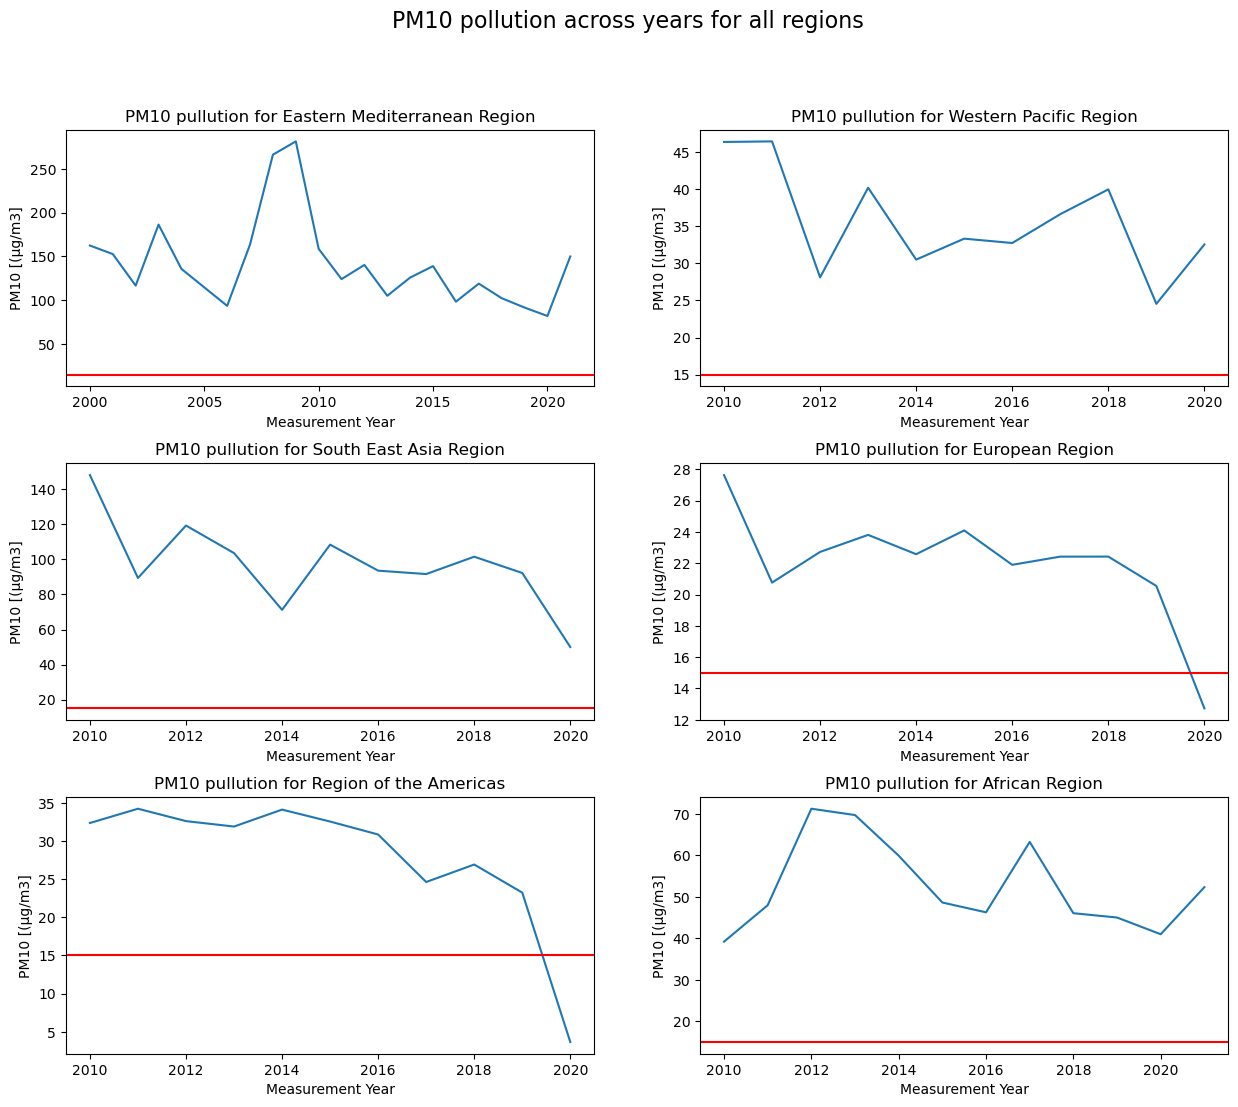

In [24]:
i = 0
j = 0

fig, ax = plt.subplots(3, 2, figsize=(15, 12))

for r in data["WHO Region"].unique():

    sub_grouped_df = grouped_df_pm10[
        grouped_df_pm10.index.get_level_values("WHO Region").isin([r])
    ]

    sns.lineplot(
        sub_grouped_df,
        x="Measurement Year",
        y=sub_grouped_df.values,
        ax=ax[i, j],
    )
    ax[i, j].axhline(y=15, color="r")
    ax[i, j].set(title=f"PM10 pullution for {r}", ylabel="PM10 [(μg/m3]")
    i += 1
    i %= 3
    j += 1
    j %= 2

plt.suptitle("PM10 pollution across years for all regions", fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

W przypadku PM10 ujemny trend występuje jedynie w Europie oraz Amerykach. Poza tymi regionami utrzymuje się on na mniej więcej stałym poziomie, ze znaczącym skokiem w okolicach roku 2009 dla regionu Wchodniego Morza Śródziemnego. Norma nie została średnio przekroczona tylko w ostatnich latach dla Europy i Ameryk. Warto zwrócić uwagę na podziałkę osi Y. W rejonach Wschodniego Morza Śródziemnego oraz Azji Południowo-Wschodniej zanieczyszczenie przyjmowało ogrmne wartości w porównaniu z pozostałymi.

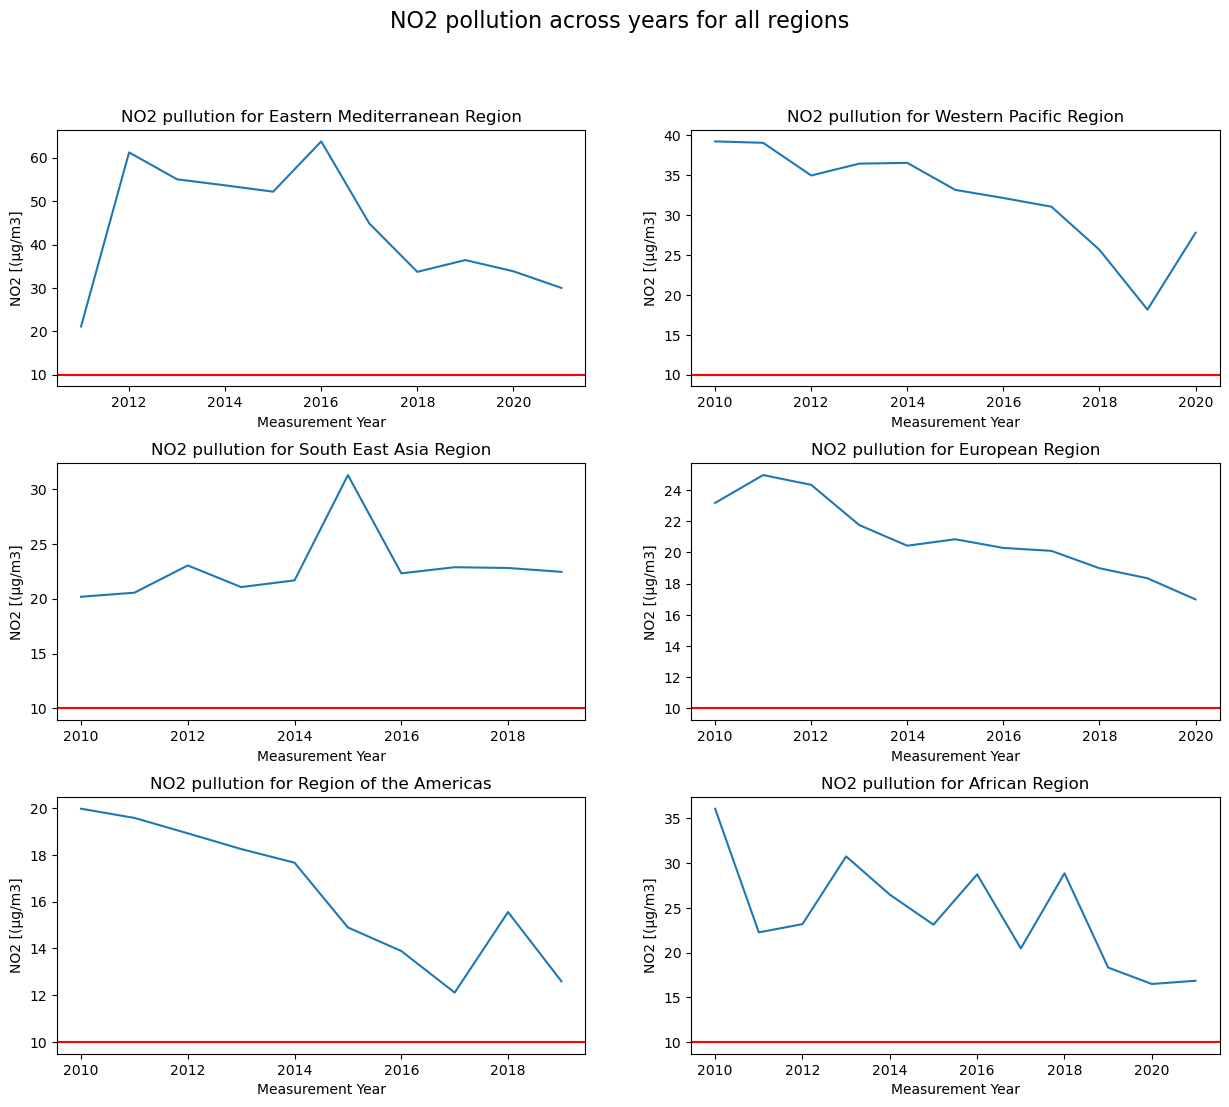

In [25]:
i = 0
j = 0

fig, ax = plt.subplots(3, 2, figsize=(15, 12))

for r in data["WHO Region"].unique():

    sub_grouped_df = grouped_df_no2[
        grouped_df_no2.index.get_level_values("WHO Region").isin([r])
    ]

    sns.lineplot(
        sub_grouped_df,
        x="Measurement Year",
        y=sub_grouped_df.values,
        ax=ax[i, j],
    )
    ax[i, j].axhline(y=10, color="r")
    ax[i, j].set(title=f"NO2 pullution for {r}", ylabel="NO2 [(μg/m3]")
    i += 1
    i %= 3
    j += 1
    j %= 2

plt.suptitle("NO2 pollution across years for all regions", fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

Wartości NO2 charakteryzuje niewielki ujemny trend dla każdego z regionów oprócz Azji Południowo-Wschodniej, gdzie istnieje niewielki trend wzrostowy. Najwyższe średnie wartości były rejestrowane w rejonie Wschodniego Morza Śródziemnego.

#### Most and least polluted regions

##### PM2.5

In [26]:
grouped_region_pm25 = data.groupby("WHO Region")["PM2.5"].mean()
pd.DataFrame(grouped_region_pm25).sort_values(by="PM2.5")

PM2.5
WHO Region                             
Region of the Americas        11.389410
European Region               14.002193
African Region                27.257120
Eastern Mediterranean Region  38.063258
Western Pacific Region        40.324123
South East Asia Region        42.841212

Zgodnie z poprzednimi spostrzeżeniami, najniższe średnie zanieczyszczenie PM2.5 występuje w regionie Ameryk oraz Europy, a najwyższe w rejonie Zachodniego Pacyfiku oraz Azji Południowo-Wschodniej.

In [27]:
grouped_region_pm25 = data.groupby("WHO Region")["PM2.5"].median()
pd.DataFrame(grouped_region_pm25).sort_values(by="PM2.5")

PM2.5
WHO Region                         
Region of the Americas         8.00
European Region               12.81
African Region                22.86
Eastern Mediterranean Region  33.00
South East Asia Region        36.50
Western Pacific Region        39.11

Mediana zanieczyszczeń PM2.5 nie odbiega znacząco od średniej, co oznacza, że całe regiony są równomierne zanieczyszczone PM2.5.

##### PM10

In [28]:
grouped_region_pm10 = data.groupby("WHO Region")["PM10"].mean()
pd.DataFrame(grouped_region_pm10).sort_values(by="PM10")

PM10
WHO Region                              
European Region                23.013879
Region of the Americas         30.677423
Western Pacific Region         32.781478
African Region                 51.906625
South East Asia Region         94.626582
Eastern Mediterranean Region  121.317951

Rejony najmniej zanieczyszczone cząsteczkami PM10 są analogiczne do tych wspomianych w przypadku PM2.5. Jednakże tutaj Europa ma pod tym względem lepsze powietrze niż Ameryki, które średnio tylko odrobinę przegrywają z Zachodnim Pacyfikiem, który miał najgorszy wynik PM2.5. Zdecydowanie najbardziej zanieczyszczonym regionem PM10 jest Wschodnie Morze Śródziemne.

In [29]:
grouped_region_pm10 = data.groupby("WHO Region")["PM10"].median()
pd.DataFrame(grouped_region_pm10).sort_values(by="PM10")

PM10
WHO Region                           
European Region                20.740
Western Pacific Region         22.400
Region of the Americas         26.085
African Region                 41.390
South East Asia Region         84.000
Eastern Mediterranean Region  109.800

Wyniki bazujące na medianie nieco odbiegają od tych opartych o średnią, co wskazują na istotne różnice w zanieczyszczeniach wewnątrz regionów z pojedynczymi krajami/miastami znacząco zanieczyszczonymi.

##### NO2

In [30]:
grouped_region_no2 = data.groupby("WHO Region")["NO2"].mean()
pd.DataFrame(grouped_region_no2).sort_values(by="NO2")

NO2
WHO Region                             
Region of the Americas        15.757890
European Region               20.389040
South East Asia Region        22.099986
African Region                23.160242
Western Pacific Region        31.970357
Eastern Mediterranean Region  45.715101

Najczystsze regiony pod względem NO2 to również Europa i Ameryki, a najbardziej zanieczyszczona - Zachodni Pacyfik oraz Wschodnie Morze Śródziemne.

In [31]:
grouped_region_no2 = data.groupby("WHO Region")["NO2"].median()
pd.DataFrame(grouped_region_no2).sort_values(by="NO2")

NO2
WHO Region                         
Region of the Americas        14.00
European Region               18.98
South East Asia Region        19.33
African Region                19.51
Western Pacific Region        33.00
Eastern Mediterranean Region  38.05

Mediana prezentuje się tutaj bardzo podobnie do średniej, tak jak w przypadku PM2.5.

#### Stations analysis

In [32]:
grouped_region_no_stations = data.groupby("WHO Region")[
    "Total number of stations"
].mean()
pd.DataFrame(grouped_region_no_stations).sort_values(by="Total number of stations")

Total number of stations
WHO Region                                            
Region of the Americas                        1.598307
European Region                               2.093603
Western Pacific Region                        2.484848
South East Asia Region                        2.516116
African Region                                2.670455
Eastern Mediterranean Region                  2.801105

Co ciekawe najmniejszą średnią liczbę stacji posiada region Ameryk, a największą - region Wschodniego Morza Śródziemnego. Należy mieć tu jednak na uwadze liczne braki w tej kolumnie.

In [33]:
grouped_region_no_stations = data.groupby("WHO Region")[
    "Total number of stations"
].median()
pd.DataFrame(grouped_region_no_stations).sort_values(by="Total number of stations")

Total number of stations
WHO Region                                            
Eastern Mediterranean Region                       1.0
European Region                                    1.0
Region of the Americas                             1.0
Western Pacific Region                             1.0
African Region                                     2.0
South East Asia Region                             2.0

Mediana wyników prezentuje się już bardziej jednostajnie, wciąż mniej więcej utrzymując kolejność regionów.

## Country-based analysis

C:\Users\adamp\AppData\Local\Temp\ipykernel_40448\2476146839.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)


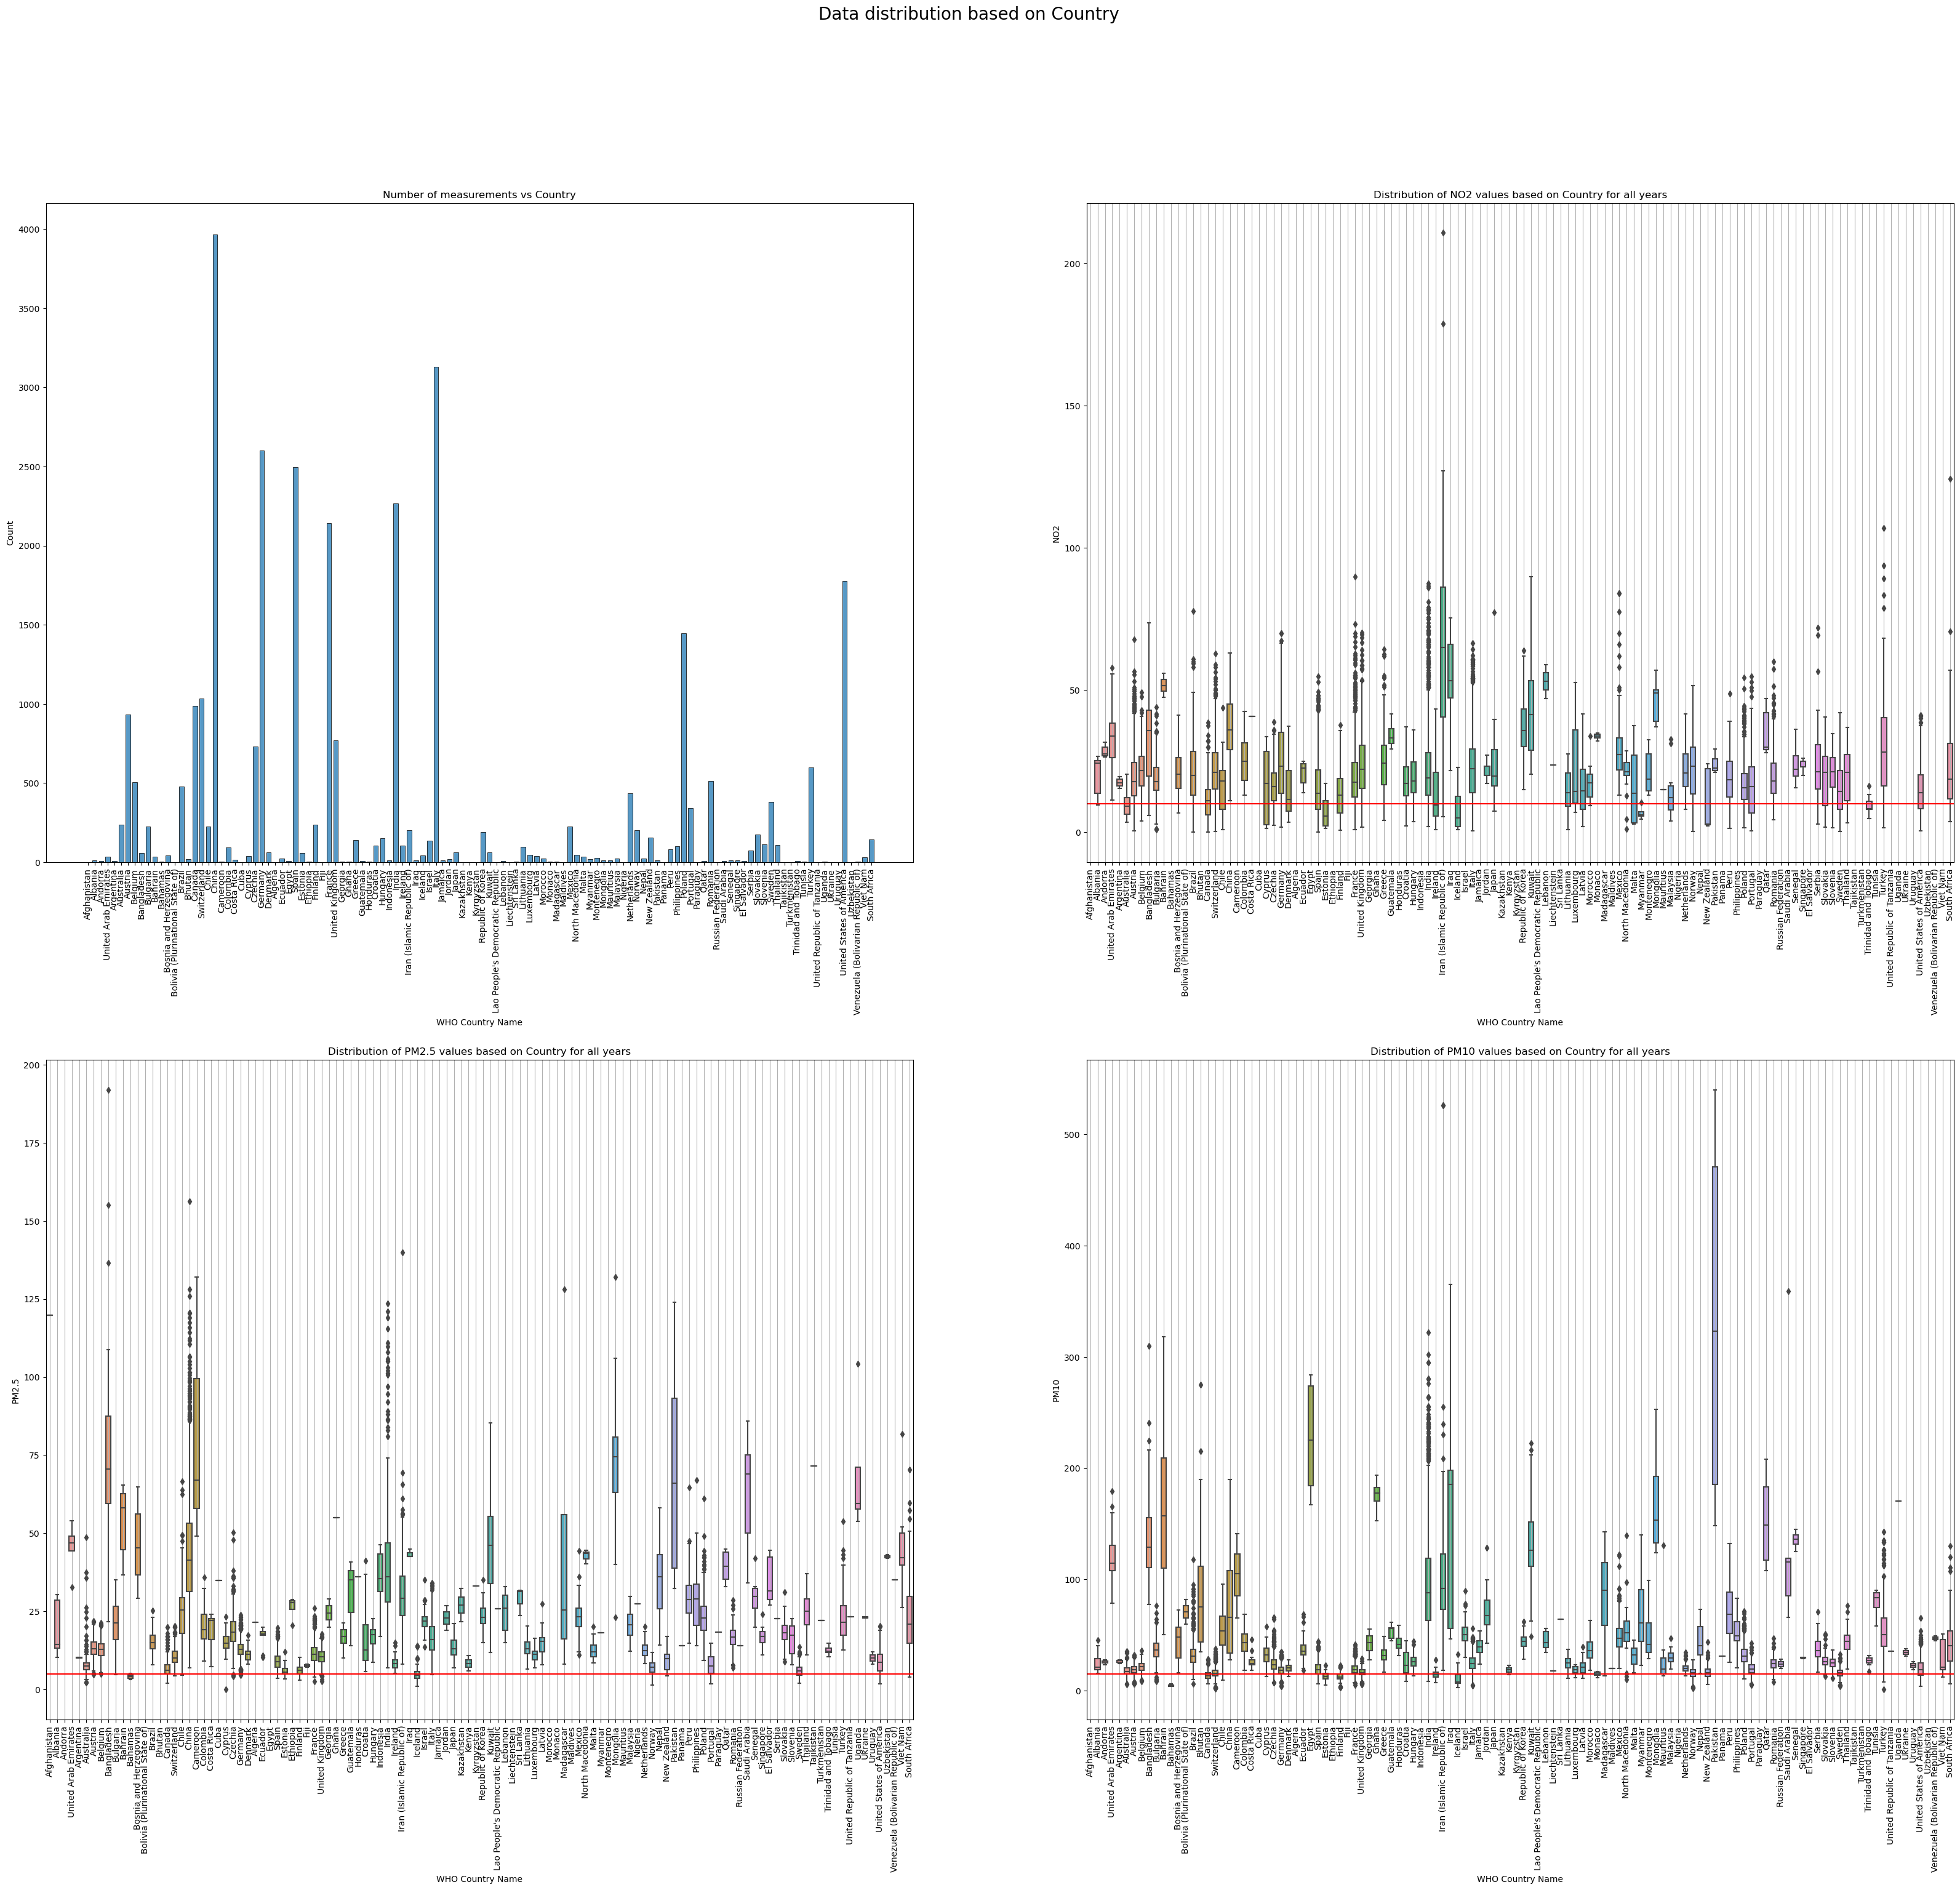

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(40, 32))

sns.histplot(data=data, x="WHO Country Name", ax=ax[0, 0], shrink=0.7)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)
ax[0, 0].set(title="Number of measurements vs Country")

sns.boxplot(data=data, y="NO2", x="WHO Country Name", ax=ax[0, 1], width=0.7)
ax[0, 1].axhline(y=10, color="r")
ax[0, 1].grid(axis="x")
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90)
ax[0, 1].set(title="Distribution of NO2 values based on Country for all years")

sns.boxplot(data=data, y="PM2.5", x="WHO Country Name", ax=ax[1, 0], width=0.7)
ax[1, 0].axhline(y=5, color="r")
ax[1, 0].grid(axis="x")
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90)
ax[1, 0].set(title="Distribution of PM2.5 values based on Country for all years")

sns.boxplot(data=data, y="PM10", x="WHO Country Name", ax=ax[1, 1], width=0.7)
ax[1, 1].axhline(y=15, color="r")
ax[1, 1].grid(axis="x")
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)
ax[1, 1].set(title="Distribution of PM10 values based on Country for all years")

plt.suptitle("Data distribution based on Country", fontsize=20)
plt.subplots_adjust(hspace=0.3)
plt.show()

Przechodząc do analizy opartej o kraje, ponownie rozpoczęto od zbadania rozkładu danych. Z histogramu w lewym górnym rogu widać, że w liczbie pomiarów zdecydowanie przodują Chiny znane z ogromnego zanieczyszczenia powietrza. Zaraz za nimi: (co ciekawe) Włochy, Niemcy, Hiszpania i Indie.\
Pod względem rozkładu wartości zanieczyszczeń PM2.5 można wyróżnić kraje z niewielkimi IQR jak np. Grecja, Malta czy USA, a także z bardzo dużymi, towarzyszącej im przy tym wysokiej medianie, tutaj: Bangladesz, Chiny, Kamerun, Mongolia, Pakista, Senegal. Chiny oraz Indie mają przy tym bardzo wiele wartości odstających powyżej 95 percentyla, co sugeruje, że istnieje wiele miast z bardzo wysokim zanieczyszczeniem PM2.5.\
Badając rozkład PM10 uwagę zwraca na siebie szczególnie Pakistan z ogromnym IQR oraz bardzo wysoką medianą. Ponadto duże zanieczyszczenia mają także: Bahrajn, Egipt, Ghana, Irak, Mongolia i Katar.\
W przypadku NO2 wartości są już mniej zróżnicowane, jednak przoduje tutaj Iran, Irak oraz Bahrajn - wszystkie położone geograficznie bardzo blisko siebie.

#### Most and least polluted countries (across all years)

Pokuszono się o wyspecyfikowanie najmniej oraz najbardziej zanieczyszczonych państw pod względem każdego ze współczynników, zarówno pod wzgledem średniej oraz mediany.

##### PM2.5

In [35]:
grouped_country_pm25 = data.groupby("WHO Country Name")["PM2.5"].mean()
grouped_country_pm25 = (
    pd.DataFrame(grouped_country_pm25).sort_values(by="PM2.5").dropna()
)
grouped_country_pm25.index[:3].to_list()

['Bahamas', 'Iceland', 'Estonia']

In [36]:
grouped_country_pm25.index[-3:].to_list()

['Bangladesh', 'Cameroon', 'Afghanistan']

In [37]:
grouped_country_pm25 = data.groupby("WHO Country Name")["PM2.5"].median()
grouped_country_pm25 = (
    pd.DataFrame(grouped_country_pm25).sort_values(by="PM2.5").dropna()
)
grouped_country_pm25.index[:3].to_list()

['Bahamas', 'Iceland', 'Estonia']

In [38]:
grouped_country_pm25.index[-3:].to_list()

['Tajikistan', 'Mongolia', 'Afghanistan']

Mediana nie wprowadziła tu znacznych zmian w stosunku do średniej, przez co można uznać Bahamy, Islandię i Estonię za najmniej zanieczyszczone kraje cząsteczkami PM2.5, a Afganistan wraz z towarzyszącymi mu na listach państwami - za najbardziej.

##### PM10

In [39]:
grouped_country_pm10 = data.groupby("WHO Country Name")["PM10"].mean()
grouped_country_pm10 = (
    pd.DataFrame(grouped_country_pm10).sort_values(by="PM10").dropna()
)
grouped_country_pm10.index[:3].to_list()

['Bahamas', 'Iceland', 'Estonia']

In [40]:
grouped_country_pm10.index[-3:].to_list()

['Ghana', 'Egypt', 'Pakistan']

In [41]:
grouped_country_pm10 = data.groupby("WHO Country Name")["PM10"].median()
grouped_country_pm10 = (
    pd.DataFrame(grouped_country_pm10).sort_values(by="PM10").dropna()
)
grouped_country_pm10.index[:3].to_list()

['Bahamas', 'Iceland', 'Finland']

In [42]:
grouped_country_pm25.index[-3:].to_list()

['Tajikistan', 'Mongolia', 'Afghanistan']

Pod względem PM10 również najlepiej wypadają Bahamy, Islandia ora Estonia, a biorąc pod uwagę medianę, także Finlandia. Najbardziej zanieczyszczone kraje to ponownie: Afganistan, Mongolia, Tadżykistan oraz Ghana i Egipt.

##### NO2

In [43]:
grouped_country_no2 = data.groupby("WHO Country Name")["NO2"].mean()
grouped_country_no2 = pd.DataFrame(grouped_country_no2).sort_values(by="NO2").dropna()
grouped_country_no2.index[:3].to_list()

['Estonia', 'Myanmar', 'Iceland']

In [44]:
grouped_country_no2.index[-3:].to_list()

['Lebanon', 'Iraq', 'Iran (Islamic Republic of)']

In [45]:
grouped_country_no2 = data.groupby("WHO Country Name")["NO2"].median()
grouped_country_no2 = pd.DataFrame(grouped_country_no2).sort_values(by="NO2").dropna()
grouped_country_no2.index[:3].to_list()

['New Zealand', 'Iceland', 'Estonia']

In [46]:
grouped_country_no2.index[-3:].to_list()

['Lebanon', 'Iraq', 'Iran (Islamic Republic of)']

Badając wartości NO2, ponownie najczystsza jest Estonia i Islandia, a dodatkowo Birma i Nowa Zelandia, a najbardziej zanieczyszczone: Iran, Irak i Liban.

#### Biggest progress and regress in air polution

Zbadano, czy na przestrzeni lat jakieś państwa odnotowały postęp w zakresie czystego powietrza, czy też wręcz przeciwne. Dodatnia wartość różnicy oznacza progress, a ujemna - regress.

##### PM2.5

In [47]:
grouped = data.groupby(["WHO Country Name", "Measurement Year"]).mean(numeric_only=True)
grouped_pm25 = grouped.dropna(subset="PM2.5")

earliest = grouped_pm25.groupby(level=0)["PM2.5"].first()
latest = grouped_pm25.groupby(level=0)["PM2.5"].last()

difference = earliest - latest  # + --> progress; - --> regress

difference

WHO Country Name
Afghanistan                            0.000000
Albania                               11.470000
Algeria                                0.000000
Argentina                             -0.150000
Australia                              7.731667
                                        ...    
United States of America               2.427462
Uruguay                               -4.000000
Uzbekistan                             1.130000
Venezuela (Bolivarian Republic of)     0.000000
Viet Nam                              42.405000
Name: PM2.5, Length: 106, dtype: float64

In [48]:
difference.sort_values()[:3]

WHO Country Name
Indonesia    -29.350000
Madagascar   -24.000000
Mongolia     -13.966667
Name: PM2.5, dtype: float64

In [49]:
difference.sort_values()[-3:]

WHO Country Name
Viet Nam    42.405000
Uganda      44.150000
Pakistan    63.043333
Name: PM2.5, dtype: float64

Jak widać największy regres pod względem PM2.5 odnotowały: Indonezja, Madagaskar oraz Mongolia, a progres: Wietnam, Uganda i Pakistan.

##### PM10

In [50]:
grouped_pm10 = grouped.dropna(subset="PM10")

earliest = grouped_pm10.groupby(level=0)["PM10"].first()
latest = grouped_pm10.groupby(level=0)["PM10"].last()

difference = earliest - latest  # + --> progress; - --> regres

difference

WHO Country Name
Albania                              -13.910000
Andorra                                2.920000
Argentina                              2.370000
Australia                              0.902971
Austria                                7.610359
                                        ...    
United Republic of Tanzania            0.000000
United States of America               2.537980
Uruguay                                6.830000
Venezuela (Bolivarian Republic of)     4.000000
Viet Nam                               3.520000
Name: PM10, Length: 102, dtype: float64

In [51]:
difference.sort_values()[:3]

WHO Country Name
Bhutan       -111.5
Egypt         -93.5
Madagascar    -93.0
Name: PM10, dtype: float64

In [52]:
difference.sort_values()[-3:]

WHO Country Name
China       117.516667
Iraq        153.630000
Pakistan    247.163333
Name: PM10, dtype: float64

Pod względem cząsteczek PM10 ogromny regres zarejestrowano w: Bhutanie, Egipcie i na Madagaskarze, a równie duży progres w: Chinach, Iraku i Pakistanie.

##### NO2

In [53]:
grouped_no2 = grouped.dropna(subset="NO2")

earliest = grouped_no2.groupby(level=0)["NO2"].first()
latest = grouped_no2.groupby(level=0)["NO2"].last()

difference = earliest - latest  # + --> progress; - --> regres

difference

WHO Country Name
Albania                     -6.115000
Andorra                      0.630000
Argentina                   -2.900000
Australia                   -1.861667
Austria                      5.462345
                              ...    
Trinidad and Tobago          0.900000
Turkey                       1.151245
United Arab Emirates       -12.878333
United Kingdom               6.645746
United States of America     4.529920
Name: NO2, Length: 77, dtype: float64

In [54]:
difference.sort_values()[:3]

WHO Country Name
Mexico                       -21.440000
Iran (Islamic Republic of)   -18.681250
United Arab Emirates         -12.878333
Name: NO2, dtype: float64

In [55]:
difference.sort_values()[-3:]

WHO Country Name
Latvia          21.580000
South Africa    22.011538
Kuwait          29.182364
Name: NO2, dtype: float64

W przypadku wartości NO2 regres odnotowano w: Meksyku, Iranie i Zjednoczonych Emiratach Arabskich, a postęp w: Litwie, Południowej Afryce oraz Kuwejcie.

#### Stations analysis

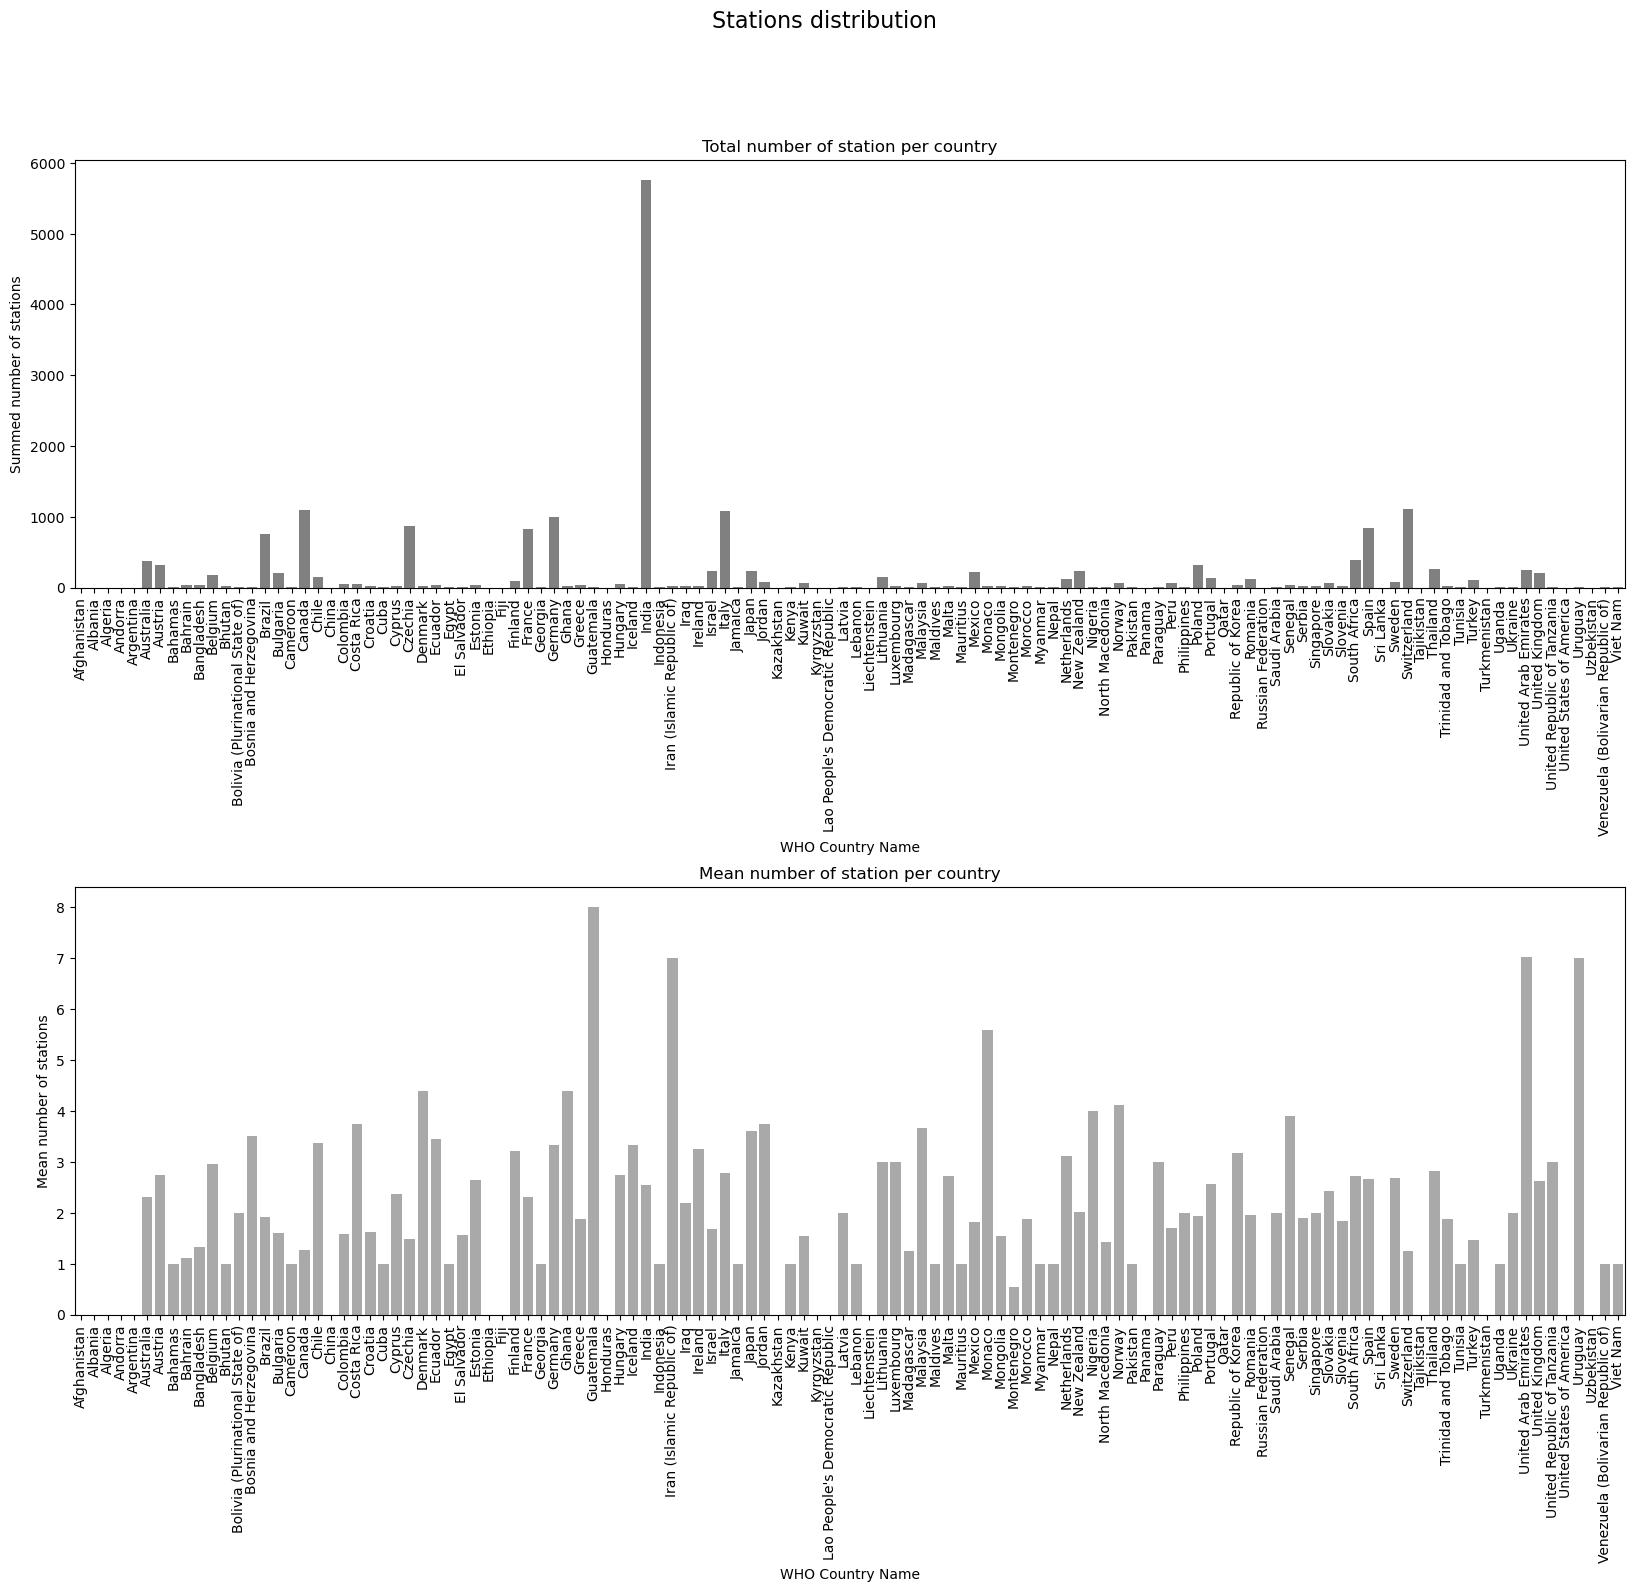

In [56]:
summed_stations_df = data.groupby("WHO Country Name")["Total number of stations"].sum()
mean_stations_df = data.groupby("WHO Country Name")["Total number of stations"].mean()

fig, ax = plt.subplots(2, 1, figsize=(20, 15))

sns.barplot(
    x=summed_stations_df.index, y=summed_stations_df.values, ax=ax[0], color="gray"
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set(
    title="Total number of station per country", ylabel="Summed number of stations"
)

sns.barplot(
    x=mean_stations_df.index, y=mean_stations_df.values, ax=ax[1], color="darkgrey"
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set(title="Mean number of station per country", ylabel="Mean number of stations")

plt.suptitle("Stations distribution", fontsize=16)
plt.subplots_adjust(hspace=0.7)
plt.show()

Podjęto się również analizy ilości stacji pomiarowych w każdym z krajów, zarówno pod względem ich całkowitej ilości, jak i średniej. W sumarycznej ilości wyróżniają się Indie, a poza nimi, choć znacznie mniej: Szwajcaria, Włochy, Niemcy, Czechy, Kanada, Francja i Hiszpania. W średniej ilości stacji prowadzi za to Gwatemala, a zaraz za nią są: Iran, Zjednoczone Emiraty Arabskie oraz Urugwaj. Należy pamiętać, że dane dotyczące ilości stacji mogą mieć wysoki bias, ze względu na dużą ilość wartości brakujących typu MCAR.

#### Air pollution map

##### PM2.5

In [57]:
grouped_country_pm25 = data.groupby(["WHO Country Name", "ISO3"])["PM2.5"].mean()
df_grouped_country_pm25 = grouped_country_pm25.reset_index()

fig = px.choropleth(
    df_grouped_country_pm25,
    locations="ISO3",
    locationmode="ISO-3",
    color="PM2.5",
    hover_name="WHO Country Name",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.update_layout(
    title_text="Average concentration of PM2.5 across all years",
)

fig.show()

Mapa świata z naniesionymi wartościami zanieczyszczeń PM2.5 wyraźnie przedstawia całą Azję Południową jako nabardziej zanieczyszczoną. Najlepiej prezentuje się Ameryka północna oraz Europa Północna i Zachodnia.

##### PM10

In [58]:
grouped_country_pm10 = data.groupby(["WHO Country Name", "ISO3"])["PM10"].mean()
df_grouped_country_pm10 = grouped_country_pm10.reset_index()

fig = px.choropleth(
    df_grouped_country_pm10,
    locations="ISO3",
    locationmode="ISO-3",
    color="PM10",
    hover_name="WHO Country Name",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.update_layout(
    title_text="Average concentration of PM10 across all years",
)

fig.show()

Podobnie jak mapa dla PM2.5, mapa dla PM10 pokazuje te same siedliska zanieczyszczeń, dodając przy tym niektóre państwa afrykańskie. Należy zauważyć, jak przerażająco prezentuje się ona dla Pakistanu.

##### NO2

In [59]:
grouped_country_no2 = data.groupby(["WHO Country Name", "ISO3"])["NO2"].mean()
df_grouped_country_no2 = grouped_country_no2.reset_index()

fig = px.choropleth(
    df_grouped_country_no2,
    locations="ISO3",
    locationmode="ISO-3",
    color="NO2",
    hover_name="WHO Country Name",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.update_layout(
    title_text="Average concentration of NO2 across all years",
)

fig.show()

Dla NO2, rozkład pomiędzy krajami jest już nieco bardziej równomiarny, ze zdecydowanie wyróżniającym się Iranem, a także Mongolią i Chinami.

## City-based analysis

#### Correlation (point-biserial)

In [60]:
cities_corr_df = data.copy()
cities_corr_df["is_India"] = cities_corr_df["WHO Country Name"].apply(
    lambda x: 1 if x == "India" else 0
)
cities_corr_df["is_China"] = cities_corr_df["WHO Country Name"].apply(
    lambda x: 1 if x == "China" else 0
)
cities_corr_df

WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                2019.0  119.77    NaN    NaN                     18.0   
1                2015.0     NaN  17.65  26.63                      NaN   
2                2016.0   14.32  24.56  24.78                      NaN   
3                2015.0     NaN    NaN  23.96                      NaN   
4                2016.0     NaN    NaN  26.26                      NaN   
...                 ...     ...    ...    ...                      ...   
32186            2015.0    7.47  24.64   7.64                     75.0   
32187            2016.0    8.42  33.28   7.27                     75.0   
32188            2017.0    6.83  20.49   8.72                     75.0   
32189            2018.0    6.10  17.99   7.15                     75.0   
32190            2016.0     NaN    NaN  17.85                      NaN   

       PM10 temporal coverage  NO2 temporal coverage  \
0                         NaN                    NaN   
1                         NaN              83.961187   
2                         NaN              87.932605   
3                         NaN              97.853881   
4                         NaN              96.049636   
...                       ...                    ...   
32186                    75.0              75.000000   
32187                    75.0              75.000000   
32188                    75.0              75.000000   
32189                    75.0              75.000000   
32190                     NaN              75.000000   

                                               Reference  \
0      U.S. Department of State, United States Enviro...   
1       European Environment Agency (downloaded in 2021)   
2       European Environment Agency (downloaded in 2021)   
3       European Environment Agency (downloaded in 2021)   
4       European Environment Agency (downloaded in 2021)   
...                                                  ...   
32186       South African Air Quality Information System   
32187       South African Air Quality Information System   
32188       South African Air Quality Information System   
32189       South African Air Quality Information System   
32190       South African Air Quality Information System   

      Number and type of monitoring stations  Total number of stations  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                        NaN                       NaN   
4                                        NaN                       NaN   
...                                      ...                       ...   
32186      3 Residential-Medium/Upper income                       3.0   
32187      2 Residential-Medium/Upper income                       2.0   
32188      2 Residential-Medium/Upper income                       2.0   
32189      2 Residential-Medium/Upper income                     

Z racji tego, że spodziewano się, iż miasta chińskie oraz indyjskie będą wyróżniały się większym zanieczyzczeniem, uwtorzono zmienne kategoryczne mówiące o przynależności do nich.

In [61]:
for i in ["is_India", "is_China"]:
    print(f"\n{i}:")
    for c in corr_cols:
        temp_df = cities_corr_df.dropna(subset=c)
        print(f"{i} vs {c}: {stats.pointbiserialr(temp_df[i], temp_df[c])}")


is_India:
is_India vs Measurement Year: SignificanceResult(statistic=-0.033722921784423314, pvalue=1.4305626692267871e-09)
is_India vs PM2.5: SignificanceResult(statistic=0.16586006739676543, pvalue=2.8436607862728626e-93)
is_India vs PM10: SignificanceResult(statistic=0.5670443433607244, pvalue=0.0)
is_India vs NO2: SignificanceResult(statistic=0.03616984654129489, pvalue=7.0204822265107e-08)
is_India vs PM2.5 temporal coverage: SignificanceResult(statistic=-0.3074306764651945, pvalue=4.829027810058524e-159)
is_India vs PM10 temporal coverage: SignificanceResult(statistic=-0.15350792280808412, pvalue=9.846775449244917e-30)
is_India vs NO2 temporal coverage: SignificanceResult(statistic=-0.33641060595561156, pvalue=0.0)
is_India vs Total number of stations: SignificanceResult(statistic=0.08462260994946087, pvalue=2.148838202164032e-15)

is_China:
is_China vs Measurement Year: SignificanceResult(statistic=0.22373939837460843, pvalue=0.0)
is_China vs PM2.5: SignificanceResult(statistic=

c:\Users\adamp\anaconda3\envs\ml_moje\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

c:\Users\adamp\anaconda3\envs\ml_moje\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

c:\Users\adamp\anaconda3\envs\ml_moje\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Wartości współczynników korelacji punktowo-dwuseryjnej pokazały, że gdy dane miasto należy do Indii, istnieje duża szansa, że jest bardzo zanieczyszczone cząsteczkami PM10. W przypadku, gdy miasto należy do Chin, będzie ono najprawdopodobniej wysokie stężenie PM2.5.

#### Most and least polluted cities (across all years)

##### PM2.5

In [62]:
grouped_city_pm25 = data.groupby(["WHO Country Name", "City or Locality"])[
    "PM2.5"
].mean()
grouped_city_pm25 = pd.DataFrame(grouped_city_pm25).sort_values(by="PM2.5").dropna()
grouped_city_pm25.index[:10].to_list()

[('Portugal', 'Porto Santo'),
 ('Norway', 'Todalen'),
 ('Sweden', 'Bredkalen'),
 ('Australia', 'Emu River'),
 ('Australia', 'St Helens'),
 ('Iceland', 'Suðurnesjabær'),
 ('Iceland', 'Husavik'),
 ('Australia', 'Fingal'),
 ('Norway', 'Birkeland'),
 ('Canada', 'Steeper')]

In [63]:
grouped_city_pm25.index[-10:].to_list()

[('China', 'Hetian Shi'),
 ('Pakistan', 'Rawalpindi'),
 ('China', 'Hotan'),
 ('China', 'Kashi Shi'),
 ('India', 'Delhi'),
 ('India', 'Hapur'),
 ('India', 'Noida'),
 ('India', 'Agra'),
 ('Afghanistan', 'Kabul'),
 ('Cameroon', 'Bamenda')]

In [64]:
grouped_city_pm25 = data.groupby(["WHO Country Name", "City or Locality"])[
    "PM2.5"
].median()
grouped_city_pm25 = pd.DataFrame(grouped_city_pm25).sort_values(by="PM2.5").dropna()
grouped_city_pm25.index[:10].to_list()

[('Portugal', 'Porto Santo'),
 ('Norway', 'Todalen'),
 ('Sweden', 'Bredkalen'),
 ('Australia', 'Emu River'),
 ('Australia', 'St Helens'),
 ('Iceland', 'Suðurnesjabær'),
 ('Australia', 'Fingal'),
 ('Canada', 'Steeper'),
 ('Canada', 'Labrador City'),
 ('Iceland', 'Husavik')]

In [65]:
grouped_city_pm25.index[-10:].to_list()

[('China', 'Hetian'),
 ('China', 'Hetian Shi'),
 ('Pakistan', 'Rawalpindi'),
 ('China', 'Hotan'),
 ('India', 'Agra'),
 ('India', 'Delhi'),
 ('India', 'Hapur'),
 ('India', 'Noida'),
 ('Afghanistan', 'Kabul'),
 ('Cameroon', 'Bamenda')]

Podobnie jak w przypadku analizy na podstawie krajów, tak i tutaj przedstawiono najbardziej i najmniej zanieczyszczone miasta badając i średnią i medianę zanieczyszczeń. Widać, że najczystsze pod względem PM2.5 są miasta na północy Europy oraz wybrane lokalizacje w Australii i Kanadzie. Najbardziej zanieczyszczone są miasta chińskie, indyjskie oraz Bamenda w Kamerunie, stolica Afganistanu - Kabul oraz pakistańskie Rawalpindi.

##### PM10

In [66]:
grouped_city_pm10 = data.groupby(["WHO Country Name", "City or Locality"])[
    "PM10"
].mean()
grouped_city_pm10 = pd.DataFrame(grouped_city_pm10).sort_values(by="PM10").dropna()
grouped_city_pm10.index[:10].to_list()

[('Switzerland', 'Jungfraujoch'),
 ('Iceland', 'Suðurnesjabær'),
 ('Norway', 'Todalen'),
 ('Finland', 'Muonio'),
 ('Sweden', 'Bredkalen'),
 ('Germany', 'Garmisch-Partenkirchen'),
 ('Norway', 'Hurdal Municipality'),
 ('Bahamas', 'Nassau'),
 ('Norway', 'Birkeland'),
 ('Sweden', 'Malmberget')]

In [67]:
grouped_city_pm10.index[-10:].to_list()

[('Egypt', 'Greater Cairo'),
 ('Bahrain', 'Ras Hayan'),
 ('Iran (Islamic Republic of)', 'Boshehr'),
 ('India', 'Jharia'),
 ('Bahrain', 'Hamad Town'),
 ('Saudi Arabia', 'Al Jubail'),
 ('Iraq', 'Basra'),
 ('Pakistan', 'Rawalpindi'),
 ('Iran (Islamic Republic of)', 'Zabol'),
 ('Pakistan', 'Peshawar')]

In [68]:
grouped_city_pm10 = data.groupby(["WHO Country Name", "City or Locality"])[
    "PM10"
].median()
grouped_city_pm10 = pd.DataFrame(grouped_city_pm10).sort_values(by="PM10").dropna()
grouped_city_pm10.index[:10].to_list()

[('Switzerland', 'Jungfraujoch'),
 ('Iceland', 'Suðurnesjabær'),
 ('Norway', 'Todalen'),
 ('Finland', 'Muonio'),
 ('Sweden', 'Bredkalen'),
 ('Germany', 'Garmisch-Partenkirchen'),
 ('Norway', 'Hurdal Municipality'),
 ('Bahamas', 'Nassau'),
 ('Sweden', 'Malmberget'),
 ('Italy', 'Alpe Devero')]

In [69]:
grouped_city_pm10.index[-10:].to_list()

[('Bahrain', 'Ras Hayan'),
 ('Iran (Islamic Republic of)', 'Boshehr'),
 ('Egypt', 'Greater Cairo'),
 ('India', 'Jharia'),
 ('Bahrain', 'Hamad Town'),
 ('Saudi Arabia', 'Al Jubail'),
 ('Iraq', 'Basra'),
 ('Pakistan', 'Rawalpindi'),
 ('Iran (Islamic Republic of)', 'Zabol'),
 ('Pakistan', 'Peshawar')]

Dla PM10 wyniki prezentują się podobnie, dodając do "czystych miast" Jungfraujoch w Szwajcarii, Garmisch-Partenkirchen w Niemczech oraz Nassau na Bahamach. Najbardziej zanieczyszczone są miasta leżące całkiem blisko siebie w Azji Południowo-Wschodniej oraz Egipcie.

##### NO2

In [70]:
grouped_city_no2 = data.groupby(["WHO Country Name", "City or Locality"])["NO2"].mean()
grouped_city_no2 = pd.DataFrame(grouped_city_no2).sort_values(by="NO2").dropna()
grouped_city_no2.index[:10].to_list()

[('Canada', 'Aylesford'),
 ('Canada', 'Southampton'),
 ('Switzerland', 'Jungfraujoch'),
 ('Norway', 'Hemnes'),
 ('Sweden', 'Bredkalen'),
 ('Norway', 'Todalen'),
 ('Austria', 'Rauris'),
 ('Italy', "Sant'eufemia A Maiella"),
 ('Italy', 'Seulo'),
 ('Finland', 'Muonio')]

In [71]:
grouped_city_no2.index[-10:].to_list()

[('Mexico', 'Zona Metropolitana Del Valle De Toluca'),
 ('Brazil', 'Belo Horizonte'),
 ('Kuwait', 'Ali Subah Al-Salem'),
 ('Iran (Islamic Republic of)', 'Tehran'),
 ('Iran (Islamic Republic of)', 'Varamin'),
 ('Iran (Islamic Republic of)', 'Orumye'),
 ('Iran (Islamic Republic of)', 'Pakdasht'),
 ('Iran (Islamic Republic of)', 'Hamedan'),
 ('Iran (Islamic Republic of)', 'Yasoj'),
 ('Iran (Islamic Republic of)', 'Arak')]

In [72]:
grouped_city_no2 = data.groupby(["WHO Country Name", "City or Locality"])[
    "NO2"
].median()
grouped_city_no2 = pd.DataFrame(grouped_city_no2).sort_values(by="NO2").dropna()
grouped_city_no2.index[:10].to_list()

[('Canada', 'Aylesford'),
 ('Canada', 'Southampton'),
 ('Switzerland', 'Jungfraujoch'),
 ('Norway', 'Hemnes'),
 ('Sweden', 'Bredkalen'),
 ('Norway', 'Todalen'),
 ('Austria', 'Rauris'),
 ('Italy', "Sant'eufemia A Maiella"),
 ('Italy', 'Seulo'),
 ('Finland', 'Muonio')]

In [73]:
grouped_city_no2.index[-10:].to_list()

[('Mexico', 'Zona Metropolitana Del Valle De Toluca'),
 ('Brazil', 'Belo Horizonte'),
 ('Kuwait', 'Ali Subah Al-Salem'),
 ('Iran (Islamic Republic of)', 'Varamin'),
 ('Iran (Islamic Republic of)', 'Tehran'),
 ('Iran (Islamic Republic of)', 'Orumye'),
 ('Iran (Islamic Republic of)', 'Pakdasht'),
 ('Iran (Islamic Republic of)', 'Hamedan'),
 ('Iran (Islamic Republic of)', 'Yasoj'),
 ('Iran (Islamic Republic of)', 'Arak')]

W przypadku NO2 także przodują miasta północy, dodając do nich austriackie Rauris, a także włoskie Sant'eufemia A Maniella i Seulo. Najbardziej zanieczyszczone są praktycznie wszystkie miasta Iranu oraz Ali Subah Al-Salem w Kuwejcie, Belo Horizonte w Brazylii oraz Zona Metropolitana Del Valle De Toluca w Meksyku.

#### Biggest progress and regress in air polution

##### PM2.5

In [74]:
grouped = data.groupby(
    ["WHO Country Name", "City or Locality", "Measurement Year"]
).mean(numeric_only=True)
grouped_pm25 = grouped.dropna(subset="PM2.5")

earliest = grouped_pm25.groupby(level=(0, 1))["PM2.5"].first()
latest = grouped_pm25.groupby(level=(0, 1))["PM2.5"].last()

difference = earliest - latest  # + --> progress; - --> regres

difference

WHO Country Name                    City or Locality
Afghanistan                         Kabul                0.00
Albania                             Durres               0.00
                                    Korce                1.70
                                    Vlore                0.00
                                    Vrith                0.00
                                                        ...  
Uruguay                             Montevideo          -4.00
Uzbekistan                          Tashkent             1.13
Venezuela (Bolivarian Republic of)  Barcelona            0.00
Viet Nam                            Ha Noi              29.67
                                    Ho Chi Minh City    15.42
Name: PM2.5, Length: 4038, dtype: float64

In [75]:
difference.sort_values()[:10]

WHO Country Name  City or Locality       
Pakistan          Lahore                    -55.88
Philippines       Nia Road                  -31.00
China             Xinfu District, Xinzhou   -26.45
Saudi Arabia      Yanbu                     -25.00
China             Weifang                   -24.40
India             Singrauli                 -24.34
Madagascar        Antananarivo              -24.00
China             Hetian                    -24.00
                  Hotan                     -23.92
                  Zhanhe Qu                 -23.16
Name: PM2.5, dtype: float64

In [76]:
difference.sort_values()[-10:]

WHO Country Name            City or Locality
China                       Weibin Qu           44.93
                            Shijiazhuang        47.33
                            Hengshui            47.34
                            Beijing             48.50
South Africa                Waterberg           51.56
Bangladesh                  Barisal             58.23
China                       Xingtai             59.00
                            Baoding             59.67
Bangladesh                  Rajshahi            64.05
Iran (Islamic Republic of)  Zabol               70.61
Name: PM2.5, dtype: float64

Przechodząc do analizy progresu i regresu, widać, że w przypadku PM2.5 po obu stronach barykady znajdują się miasta chińskie, w tym sama stolica. Największy postęp dokonał się w irańskim Zabol, a zwiększenie zanieczyszczenia w pakistańskim Lahore.

##### PM10

In [77]:
grouped_pm10 = grouped.dropna(subset="PM10")

earliest = grouped_pm10.groupby(level=(0, 1))["PM10"].first()
latest = grouped_pm10.groupby(level=(0, 1))["PM10"].last()

difference = earliest - latest  # + --> progress; - --> regres

difference

WHO Country Name  City or Locality  
Albania           Durres               -6.91
                  Korce                 5.10
                  Vlore                -7.46
                  Vrith                 0.00
Andorra           Escaldes-Engordany    2.92
                                        ... 
Viet Nam          Ha Long               1.00
                  Ha Noi               -3.00
                  Hue                   6.00
                  Nha Trang            -1.00
                  Viet Tri              5.00
Name: PM10, Length: 4426, dtype: float64

In [78]:
difference.sort_values()[:10]

WHO Country Name  City or Locality
Bhutan            Pasakha            -170.00
Bahrain           Ma'ameer           -147.55
India             Gorakpur           -140.67
                  Singrauli          -109.00
Egypt             Greater Cairo      -105.00
Madagascar        Antananarivo        -93.00
Egypt             Delta Region        -82.00
India             Imphal              -80.00
                  Bhopal              -72.04
                  Jodhpur             -71.61
Name: PM10, dtype: float64

In [79]:
difference.sort_values()[-10:]

WHO Country Name            City or Locality     
North Macedonia             Tetove                    89.54
Bangladesh                  Khulna                    92.49
Kuwait                      Al Ahmadi                 93.01
                            Al-Ahmadi                 93.01
Mauritius                   Beau Bassin/Rose Hill     93.98
Iran (Islamic Republic of)  Gachsaran                 97.58
Turkey                      Batman                    97.65
India                       Nanded                   118.67
Iran (Islamic Republic of)  Qazvin                   125.80
Iraq                        Baghdad                  151.13
Name: PM10, dtype: float64

W przypadku PM10 ogromny regres zaszedł w Pasakha w Bhutanie, w Ma'ameer w Bahrajnie i Gorakpurze w Indiach, a progres: w stolicu Iraku, w Qazvin w Iranie oraz w Nanded w Indiach.

##### NO2

In [80]:
grouped_no2 = grouped.dropna(subset="NO2")

earliest = grouped_no2.groupby(level=(0, 1))["NO2"].first()
latest = grouped_no2.groupby(level=(0, 1))["NO2"].last()

difference = earliest - latest  # + --> progress; - --> regres

difference

WHO Country Name          City or Locality  
Albania                   Durres                 1.85
                          Elbasan               -0.74
                          Korce                  0.00
                          Vlore                  0.00
                          Vrith                  0.00
                                                ...  
United States of America  Wichita (Ks)           1.00
                          Winston-Salem (Nc)     2.00
                          Worcester (Ma-Ct)      6.60
                          York-Hanover (Pa)     12.80
                          Yuba City (Ca)         1.90
Name: NO2, Length: 4403, dtype: float64

In [81]:
difference.sort_values()[:10]

WHO Country Name            City or Locality
India                       Pune               -48.67
Mexico                      Mexico City        -47.39
India                       Karimnagar         -43.00
                            Ramagundam         -43.00
                            Warangal           -41.50
Iran (Islamic Republic of)  Pakdasht           -36.36
India                       Khammam            -35.50
Bangladesh                  Barisal            -35.06
India                       Delhi              -32.56
Iran (Islamic Republic of)  Ahvaz              -30.26
Name: NO2, dtype: float64

In [82]:
difference.sort_values()[-10:]

WHO Country Name            City or Locality    
Germany                     Leonberg                34.10
Italy                       Ferentino               34.13
China                       Guangzhou               36.00
France                      La Mulatiere            37.15
Germany                     Freiburg Im Breisgau    43.79
Serbia                      Novi Sad                47.55
Brazil                      Betim                   47.98
Iran (Islamic Republic of)  Shiraz                  51.73
Japan                       Kagoshima City          62.16
Iran (Islamic Republic of)  Varamin                 79.12
Name: NO2, dtype: float64

Dla wartości NO2 zaszły mniejsze zmiany niż dla PM10 oraz PM2.5, ale największy regres zanotowano głównie w miastach indyjskich, a progres w Varamin w Iranie, Kagoszimie w Japoni oraz stolicy Iranu.

#### Stations analysis

In [83]:
summed_by_cities_stations_df = (
    data.groupby(["WHO Country Name", "City or Locality"])["Total number of stations"]
    .sum()
    .reset_index()
)

summed_by_cities_stations_df.sort_values("Total number of stations", ascending=False)[
    :10
]

WHO Country Name City or Locality  Total number of stations
3609                 India          Kolkata                     278.0
6467  United Arab Emirates        Abu Dhabi                     113.0
2308               Czechia           Prague                     105.0
423                 Brazil   Rio De Janeiro                      86.0
434                 Brazil        Sao Paulo                      86.0
3561                 India        Hyderabad                      86.0
3485                 India          Chennai                      81.0
3510                 India            Delhi                      77.0
5615          South Africa     Gert Sibande                      77.0
3590                 India           Kanpur                      76.0

Tutaj zbadano, w których miastach na świecie znajduje się najwięcej stacji pomiarowych wedle dostępnych danych. Jak widać najwięcej jest ich w Kalkucie, Abu Dhabi oraz Pradze.

#### Air pollution map

In [84]:
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut

# geolocator = Nominatim(user_agent="EDA")

# data_lon_lat = data.copy()

# cities_list = data_lon_lat["City or Locality"].unique()
# cities_df = pd.DataFrame({"City": cities_list, "Longitude": None, "Latitude": None})


# def get_coordinates(city):
#     try:
#         location = geolocator.geocode(city)
#         if location:
#             return location.longitude, location.latitude
#         else:
#             return None, None
#     except GeocoderTimedOut as e:
#         print("Error: geocode failed on input %s with message %s" % (city, e.message))


# cities_df[["Longitude", "Latitude"]] = cities_df["City"].apply(
#     lambda x: pd.Series(get_coordinates(x))
# )
# cities_df

W celu wykonania mapy miast i zanieczyszczeń próbowano zmapować miasta na współrzędne geograficzne, co ostatecznie się nie udało ze względu na zbyt dużą liczbę zapytań (zbyt dużą liczbę miast w analizowanym zbiorze danych).

W związku z tym wspomożono się plikiem dostępnym pod tym adresem: https://simplemaps.com/data/world-cities

##### Get cities coords

In [85]:
cities_gdf = gpd.read_file("../data/worldcities.csv")

data_lat_lng = data.merge(cities_gdf, left_on="City or Locality", right_on="city")
print(len(data_lat_lng["City or Locality"].unique()))
print(len(data["City or Locality"].unique()))
data_lat_lng

2535
6874


WHO Region ISO3 WHO Country Name    City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan               Kabul   
1                   European Region  ALB          Albania             Elbasan   
2                   European Region  ALB          Albania             Elbasan   
3                   European Region  ALB          Albania             Elbasan   
4                   European Region  AND          Andorra  Escaldes-Engordany   
...                             ...  ...              ...                 ...   
17597        Western Pacific Region  VNM         Viet Nam           Nha Trang   
17598                African Region  ZAF     South Africa        Richards Bay   
17599                African Region  ZAF     South Africa        Richards Bay   
17600                African Region  ZAF     South Africa        Richards Bay   
17601                African Region  ZAF     South Africa        Richards Bay   

       Measurement Year   PM2.5   PM10    NO2  PM2.5 temporal coverage  \
0                2019.0  119.77    NaN    NaN                     18.0   
1                2015.0     NaN    NaN  23.96                      NaN   
2                2016.0     NaN    NaN  26.26                      NaN   
3                2017.0     NaN    NaN  24.70                      NaN   
4                2012.0     NaN  27.50  31.64                      NaN   
...                 ...     ...    ...    ...                      ...   
17597            2015.0     NaN  14.00    NaN                      NaN   
17598            2012.0   13.00    NaN    NaN                      NaN   
17599            2017.0     NaN  28.41    NaN                      NaN   
17600            2018.0     NaN  28.37    NaN                      NaN   
17601            2019.0     NaN  23.61    NaN                      NaN   

       PM10 temporal coverage  ...       lat       lng       country  iso2  \
0                         NaN  ...   34.5253   69.1783   Afghanistan    AF   
1                         NaN  ...   41.1111   20.0806       Albania    AL   
2                         NaN  ...   41.1111   20.0806       Albania    AL   
3                         NaN  ...   41.1111   20.0806       Albania    AL   
4                         NaN  ...   42.5089    1.5408       Andorra    AD   
...                       ...  ...       ...       ...           ...   ...   
17597                     NaN  ...   12.2450  109.1917       Vietnam    VN   
17598                     NaN  ...  -28.7694   32.0594  South Africa    ZA   
17599                     NaN  ...  -28.7694   32.0594  South Africa    ZA   
17600                     NaN  ...  -28.7694   32.0594  South Africa    ZA   
17601                     NaN  ...  -28.7694   32.0594  South Africa    ZA   

      iso3          admin_name  capital population          id geometry  
0      AFG               Kābul  primary    4273156  1004993580     None  
1      ALB             Elbasan    admin      78703  1008409270     None  
2      ALB             Elbasan    admin      78703  1008409270     None  
3      ALB             Elbasan    admin      78703  1008409270     None  
4      AND  Escaldes-Engordany    admin      14917  1020008674     None  
...    ...                 ...      ...        ...         ...      ...  
17597  VNM           Khánh Hòa    admin     392279  1704497901     None  
17598  ZAF       KwaZulu-Natal               57387  1710347129     None  
17599  ZAF       KwaZulu-Natal               57387  1710347129     None  
17600  ZAF       KwaZulu-Natal               57387  1710347129     None  
17601  ZAF       KwaZulu-Natal               57387  1710347129     None  

[17602 rows x 26 columns]

W pliku tym znajdują się wszystkie stolice państw oraz stanów/województw (prawie połowa z analizowanych), zatem uznano ten zbiór za reprezentatywny.

##### PM2.5

In [86]:
grouped_city_pm25 = data_lat_lng.groupby(
    ["WHO Country Name", "City or Locality", "lat", "lng"]
)["PM2.5"].mean()
df_grouped_city_pm25 = grouped_city_pm25.reset_index().dropna()

fig = px.scatter_geo(
    df_grouped_city_pm25,
    lat=df_grouped_city_pm25["lat"],
    lon=df_grouped_city_pm25["lng"],
    color="PM2.5",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
    hover_name="City or Locality",
)

fig.update_layout(
    title_text="Average concentration of PM2.5 across all years",
)

fig.show()

Utworzona mapa zanieczyszczeń poszczególnych miast pokazuje niektóre miasta Afryki oraz całą Azję Południową jako najbardziej zanieczyszczone, a Amerykę Północną, Australię oraz Europę Północną jako te z najlepszym powietrzem pod względem PM2.5.

##### PM10

In [87]:
grouped_city_pm10 = data_lat_lng.groupby(
    ["WHO Country Name", "City or Locality", "lat", "lng"]
)["PM10"].mean()
df_grouped_city_pm10 = grouped_city_pm10.reset_index().dropna()

fig = px.scatter_geo(
    df_grouped_city_pm10,
    lat=df_grouped_city_pm10["lat"],
    lon=df_grouped_city_pm10["lng"],
    color="PM10",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
    hover_name="City or Locality",
)

fig.update_layout(
    title_text="Average concentration of PM10 across all years",
)

fig.show()

Mapa PM10 prezentuje się analogicznie do mapy z PM2.5. Tutaj jedynie ze względu na dostępność danych o PM10 oraz o miastach, to głównie Indie i Pakistan są wskazane jako najbardziej zanieczyszczone.

##### NO2

In [88]:
grouped_city_no2 = data_lat_lng.groupby(
    ["WHO Country Name", "City or Locality", "lat", "lng"]
)["NO2"].mean()
df_grouped_city_no2 = grouped_city_no2.reset_index().dropna()

fig = px.scatter_geo(
    df_grouped_city_no2,
    lat=df_grouped_city_no2["lat"],
    lon=df_grouped_city_no2["lng"],
    color="NO2",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
    hover_name="City or Locality",
)

fig.update_layout(
    title_text="Average concentration of NO2 across all years",
)

fig.show()

W przypadku NO2 nie można określić konkretnego regionu jako najbardziej zanieczyszczonego, może oprócz Teheranu w Iranie. Tutaj niestety wartości NO2 są wszędzie podobnie wysokie.

Na pytania 1-4, a także częściowo kolejne, wypowiedziano się w trakcie analizy. Poniżej odpowiedzi na pytania 5-7.

5. Na podstawie przeprowadzonej analizy widać wyraźnie dodatnią zależność pomiędzy wartościami PM2.5 oraz PM10, co jest zgodne z codzienymi obserwacjami - zanieczyszczenia ta powstają w wyniku emisji spalin samochodowych oraz paleniu w piecach, zatem oba są produkowane w mniej więcej podobny sposób. Ponadto można wskazać rejony Bliskiego Wschodu oraz Azji Południowo-Wschodniej jako te najbardziej zanieczyszczone. Co ważne, często (choć nie zawsze) są to regiony biedne, kraje rozwijające się, co można dość łatwo połączyć. W takich miejscach panuje zdecydowanie mniejsza świadomość ekologiczna, jest mniejszy współczynnik ludzi wykształconych, a żyjący tam ludzie mają często po prostu inne priorytety. W związku z tym regiony te od lat są zanieczyszczone, co koreluje się z niskim poziomem życia.
6. Ten rodzaj danych może mieć jedynie bardzo ogólne znaczenie jako dane wejściowe do modelu ML. Dane te są zagregowane do roku, co jest dość dużym stopniem generalizacji, ponadto występuje tu wiele braków i można by przewidzieć jedynie ogólne trendy, tzn. które miejsca ogólnie staną się jeszcze bardziej, lub też nieco mniej zanieczyszczone. Należałoby dodać choćby dane miesięczne, aby np. móc predykować w jakich okresach roku należy nosić maseczki antysmogowe w danych miastach, czy też wprowadzać inne obostrzenia. Niewątpliwie jednak dane te mogą pomoć wytworzyć pewien ogólny model zanieczyszczeń.
7. Przedstawiona eksploracyjna analiza danych pokazuje jak wiele można uzyskać z praktycznie surowych danych. Jesteśmy w stanie zobaczyć trendy zanieczyszczeń, ocenić najbardziej oraz najmniej zanieczyszczone miejsca, a także określić relacje między zmiennymi w oparciu o różne poziomy generalizacji. Dowiedziono, że Europa Północna słynie z czystego powietrza, podobnie jak Kanada oraz Australia i Nowa Zelandia. Ponadto przedstawiono rejon Iranu oraz krajów sąsiadujących (także "przez morze") jako te najbardziej skażone dwutlenkiem azotu. Również ukazano, że Indie oraz Chiny są świadome stopnia swojego zanieczyszczenia cząsteczkami PM2.5 oraz PM10 - to tam znajduje się najwięcej czujników jednocześnie wskazujących najwyższe zanieczyszczenie. Widać także, że oba te kraje starają się polepszyć sytuację w niektórych miastach, co przedstawia różnica w zanieczyszczeniach na korzyść ostatnich lat dla wybranych chińskich i indyjskich miast. Tak przeprowadzone EDA, pomaga ocenić, które zmienne uwzględnić w modelu, oraz który stopień generalizacji przyjąć. Pomaga także w ocenie danych wyjściowych z modelu - po porównaniu ich z tego typu analizą danych historycznych możemy ogólnie ocenić, czy model działa dobrze, czy też nie.